# **Introducción del proyecto**

El objetivo principal de este proyecto es desarrollar un modelo de aprendizaje automático que prediga el tipo de delito más probable de ocurrencia de un crimen violento en un área específica o en un momento del día. Para ello, se **utilizará como variable objetivo la columna Primary Type,** que clasifica los delitos según su naturaleza.

Basándose en datos históricos de crímenes reportados **en Chicago,** el modelo se entrenará con factores como la hora del día, la ubicación y el tipo de delito previo. Este análisis permitirá optimizar la asignación de recursos policiales y diseñar estrategias más efectivas de prevención del crimen.

**VARIABLE OBJETIVO:** PRIMARY TYPE


# **1. Cargar los datos**

Importar las librerias necesarias.

Imprimir los primeros registros.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML Proyecto/ML/NuevoProyecto/dataset/Chicago_Crimes_2012_to_2017.csv')

In [ ]:
dataset.head()

Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True  ...  24.0            29.0       08B   
1            RESIDENCE   False  ...  20.0            42.0       08B   
2               STREET   False  ...  37.0            25.0        24   
3             SIDEWALK   False  ...  28.0            25.0       08B   
4            RESIDENCE   False  ...  28.0            25.0        06   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073   
1     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922   
2     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908   
3     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687   
4     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297   

   Longitude                       Location  
0 -87.706819  (41.864073157, -87.706818608)  
1 -87.604363   (41.782921527, -87.60436317)  
2 -87.758372  (41.894908283, -87.758371958)  
3 -87.749516  (41.885686845, -87.749515983)  
4 -87.761751  (41.886297242, -87.761750709)  

[5 rows x 23 columns]

In [ ]:
dataset.shape

(1456714, 23)

**Descripción de las variables**

- **ID:** Identificador único de cada crimen.

- **Case Number:** Número de caso asignado por las autoridades para identificar el incidente.

- **Date:** Fecha y hora exacta en la que ocurrió el crimen.

- **Block:** Dirección aproximada donde tuvo lugar el crimen, presentada en forma de bloque.

- **IUCR:** Código estándar utilizado para clasificar el tipo de crimen, según las normativas policiales de Chicago.

- **Primary Type:** Tipo principal del crimen, categorizado en términos generales (por ejemplo, asalto, robo).

- **Description:** Descripción detallada del crimen, que proporciona información adicional sobre el incidente.

- **Location Description:** Lugar donde ocurrió el crimen (por ejemplo, calle, apartamento, residencia).

- **Arrest:** Indica si hubo un arresto relacionado con el crimen (True/False).

- **Domestic:** Muestra si el incidente está relacionado con violencia doméstica (True/False).

- **Beat:** Código que identifica la patrulla policial asignada al área donde ocurrió el crimen.

- **District:** Distrito policial al que pertenece el área donde ocurrió el crimen.

- **Ward:** División política de la ciudad a la que pertenece el lugar del crimen.

- **Community Area:** Número de identificación que corresponde al área comunitaria donde ocurrió el crimen.

- **FBI Code:** Código asignado por el FBI para clasificar el tipo de crimen dentro de categorías generales.

- **X Coordinate:** Coordenada X en el sistema de referencia de Chicago, útil para la ubicación geográfica.

- **Y Coordinate:** Coordenada Y en el sistema de referencia de Chicago, útil para la ubicación geográfica.

- **Year:** Año en el que ocurrió el crimen.

- **Updated On:** Fecha y hora en la que se actualizó el registro del crimen en la base de datos.

- **Latitude:** Latitud geográfica del lugar donde ocurrió el crimen.

- **Longitude:** Longitud geográfica del lugar donde ocurrió el crimen.

- **Location:** Representación combinada de la latitud y longitud en formato de texto (por ejemplo, "(41.881, -87.623)").


# **2. Análisis Exploratorio de Datos (EDA)**

Resumen estadística de las columnas númericas.

Buscar como se comportan las diferentes variables. Utilizando gráficas de visualización

Matriz de correlación para determinar nuestra variable objetivo.

### Visualizamos el resumen estadistico de nuestro dataset y analizamos los datos

In [ ]:
dataset.describe()

Unnamed: 0            ID          Beat      District          Ward  \
count  1.456714e+06  1.456714e+06  1.456714e+06  1.456713e+06  1.456700e+06   
mean   3.308606e+06  9.597550e+06  1.150644e+03  1.125920e+01  2.287027e+01   
std    1.235350e+06  8.083505e+05  6.916466e+02  6.904691e+00  1.380589e+01   
min    3.000000e+00  2.022400e+04  1.110000e+02  1.000000e+00  1.000000e+00   
25%    2.698636e+06  9.002709e+06  6.130000e+02  6.000000e+00  1.000000e+01   
50%    3.063654e+06  9.605776e+06  1.024000e+03  1.000000e+01  2.300000e+01   
75%    3.428849e+06  1.022577e+07  1.711000e+03  1.700000e+01  3.400000e+01   
max    6.253474e+06  1.082788e+07  2.535000e+03  3.100000e+01  5.000000e+01   

       Community Area  X Coordinate  Y Coordinate          Year      Latitude  \
count    1.456674e+06  1.419631e+06  1.419631e+06  1.456714e+06  1.419631e+06   
mean     3.745632e+01  1.164398e+06  1.885523e+06  2.013897e+03  4.184147e+01   
std      2.144029e+01  1.850835e+04  3.424775e+04  1.449584e+00  9.430126e-02   
min      0.000000e+00  0.000000e+00  0.000000e+00  2.012000e+03  3.661945e+01   
25%      2.300000e+01  1.152544e+06  1.858762e+06  2.013000e+03  4.176787e+01   
50%      3.200000e+01  1.166021e+06  1.891502e+06  2.014000e+03  4.185797e+01   
75%      5.600000e+01  1.176363e+06  1.908713e+06  2.015000e+03  4.190529e+01   
max      7.700000e+01  1.205119e+06  1.951573e+06  2.017000e+03  4.202271e+01   

          Longitude  
count  1.419631e+06  
mean  -8.767224e+01  
std    6.661726e-02  
min   -9.168657e+01  
25%   -8.771528e+01  
50%   -8.766613e+01  
75%   -8.762813e+01  
max   -8.752453e+01

2. Visualizamos el tipo de los datos de nuestro dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

3. Comprobamos cuantos de los datos de nuestro dataset son unicos, para posteriormente realizar cualquier preprocesamiento en ellas

In [ ]:
for col in dataset.columns:
    unique_values = dataset[col].nunique()
    print(f"{col}: {unique_values} valores únicos")

Unnamed: 0: 1456714 valores únicos
ID: 1456714 valores únicos
Case Number: 1456598 valores únicos
Date: 582146 valores únicos
Block: 32774 valores únicos
IUCR: 365 valores únicos
Primary Type: 33 valores únicos
Description: 342 valores únicos
Location Description: 142 valores únicos
Arrest: 2 valores únicos
Domestic: 2 valores únicos
Beat: 302 valores únicos
District: 24 valores únicos
Ward: 50 valores únicos
Community Area: 78 valores únicos
FBI Code: 26 valores únicos
X Coordinate: 67714 valores únicos
Y Coordinate: 111555 valores únicos
Year: 6 valores únicos
Updated On: 959 valores únicos
Latitude: 368076 valores únicos
Longitude: 367942 valores únicos
Location: 368286 valores únicos


4. Comprobamos si existen valores nulos en nuestro dataset

In [ ]:
dataset.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

5. Conteo de duplicados por 'Case Number'.

  - Comprobamos si los datos repetidos tienen algun valor significativo para la parte del objetivo del proyecto o si son meros fallos administrativos.

In [ ]:
duplicated_counts = dataset[dataset['Case Number'].duplicated(keep=False)]['Case Number'].value_counts()

print("Conteo de duplicados por 'Case Number':")
print(duplicated_counts)

Conteo de duplicados por 'Case Number':
Case Number
HZ140230    6
HZ403466    4
HZ554936    4
HY346207    4
HY442430    3
           ..
HV620483    2
HV528532    2
HV495203    2
HV490538    2
JA103468    2
Name: count, Length: 98, dtype: int64


In [ ]:
cases_of_interest = ['HZ140230']
duplicated_details = dataset[dataset['Case Number'].isin(cases_of_interest)]

print("Detalles de los casos duplicados:")
print(duplicated_details)

Detalles de los casos duplicados:
         Unnamed: 0     ID Case Number                    Date  \
7439         796443  22314    HZ140230  02/04/2016 01:00:00 PM   
7440         796444  22316    HZ140230  02/04/2016 01:00:00 PM   
7441         796445  22317    HZ140230  02/04/2016 01:00:00 PM   
7442         796446  22318    HZ140230  02/04/2016 01:00:00 PM   
7443         796447  22319    HZ140230  02/04/2016 01:00:00 PM   
1215137     4031132  22313    HZ140230  02/04/2016 01:00:00 PM   

                          Block  IUCR Primary Type          Description  \
7439     057XX S CALIFORNIA AVE  0110     HOMICIDE  FIRST DEGREE MURDER   
7440     057XX S CALIFORNIA AVE  0110     HOMICIDE  FIRST DEGREE MURDER   
7441     057XX S CALIFORNIA AVE  0110     HOMICIDE  FIRST DEGREE MURDER   
7442     057XX S CALIFORNIA AVE  0110     HOMICIDE  FIRST DEGREE MURDER   
7443     057XX S CALIFORNIA AVE  0110     HOMICIDE  FIRST DEGREE MURDER   
1215137  057XX S CALIFORNIA AVE  0110     HOMICIDE  F

### Tipos de crimenes en nuestro dataset

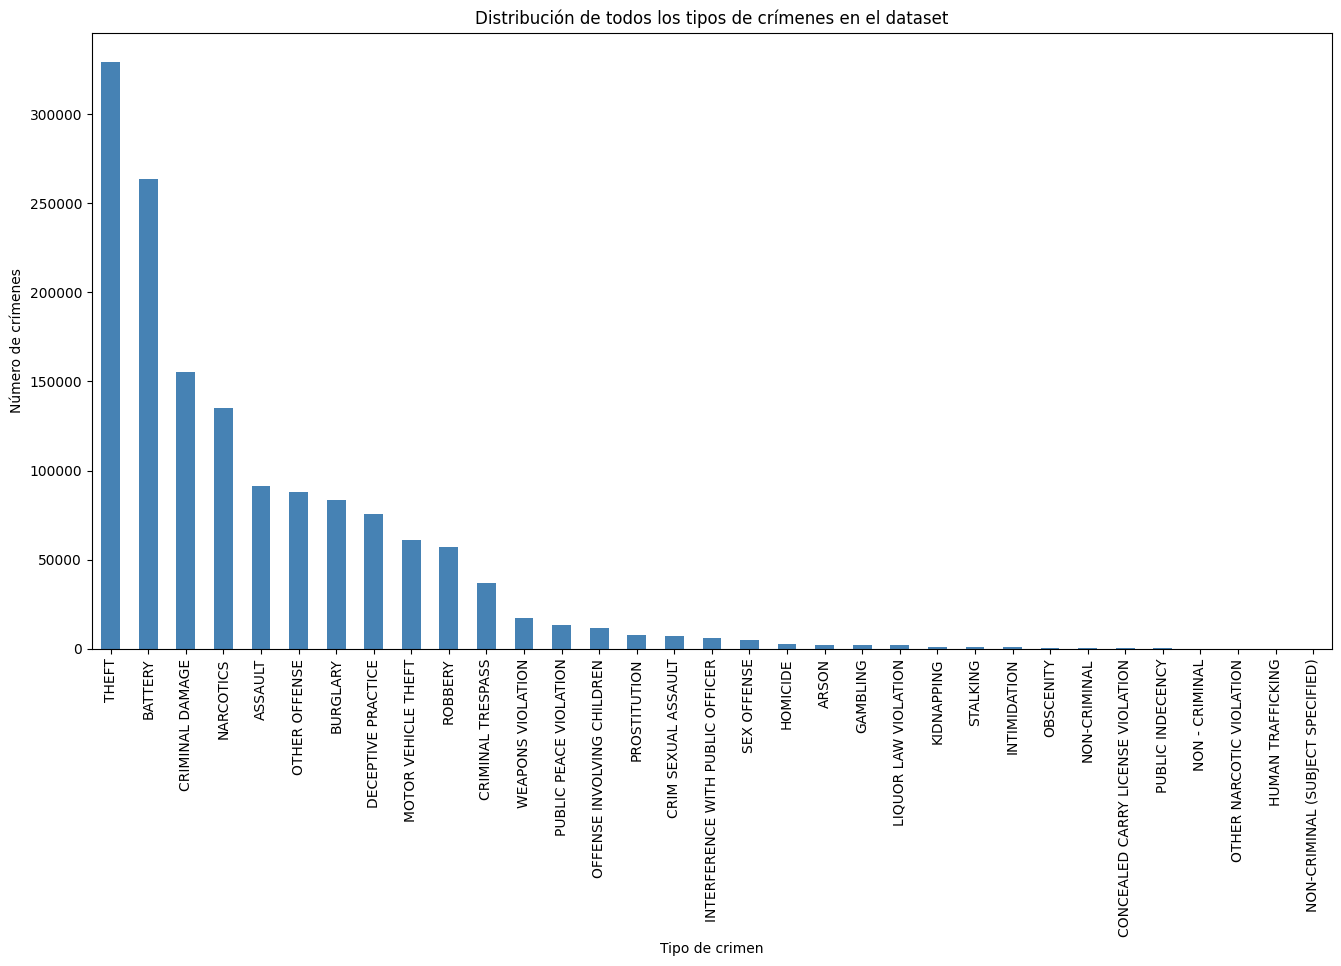

In [ ]:
crime_types = dataset['Primary Type'].value_counts()

plt.figure(figsize=(16, 8))
crime_types.plot(kind='bar', color='steelblue')
plt.title('Distribución de todos los tipos de crímenes en el dataset')
plt.xlabel('Tipo de crimen')
plt.ylabel('Número de crímenes')
plt.xticks(rotation=90)
plt.show()

### Top 10 de los tipos de crímenes

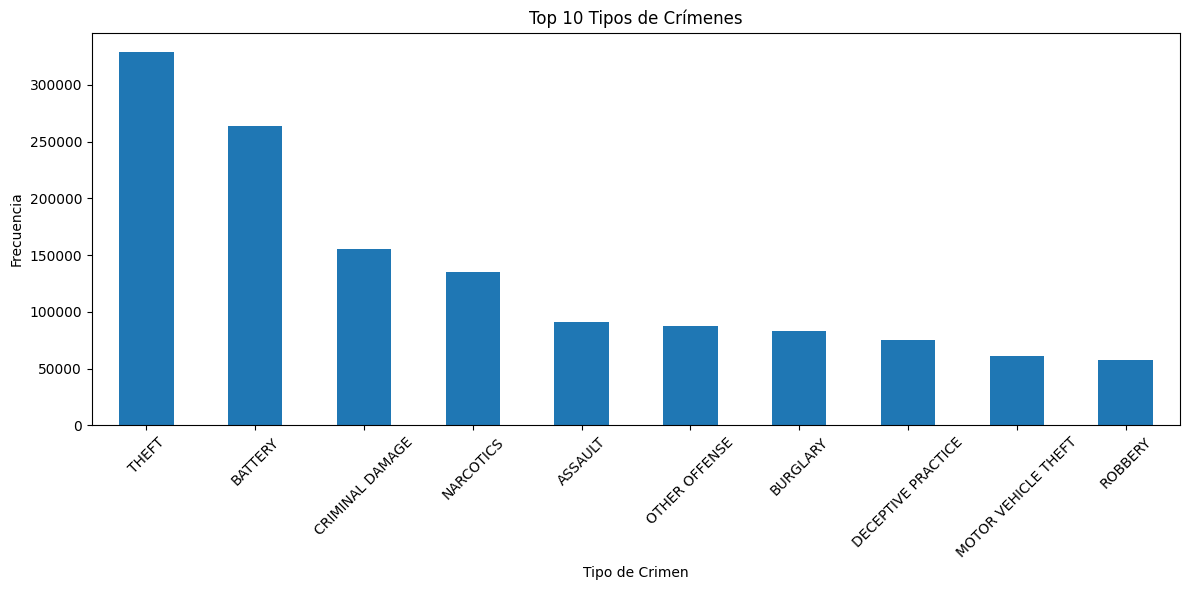

In [ ]:
plt.figure(figsize=(12, 6))
dataset['Primary Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Tipos de Crímenes')
plt.xlabel('Tipo de Crimen')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Frecuencia de arrestos por tipo de crimen (Arresto y No Arresto)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

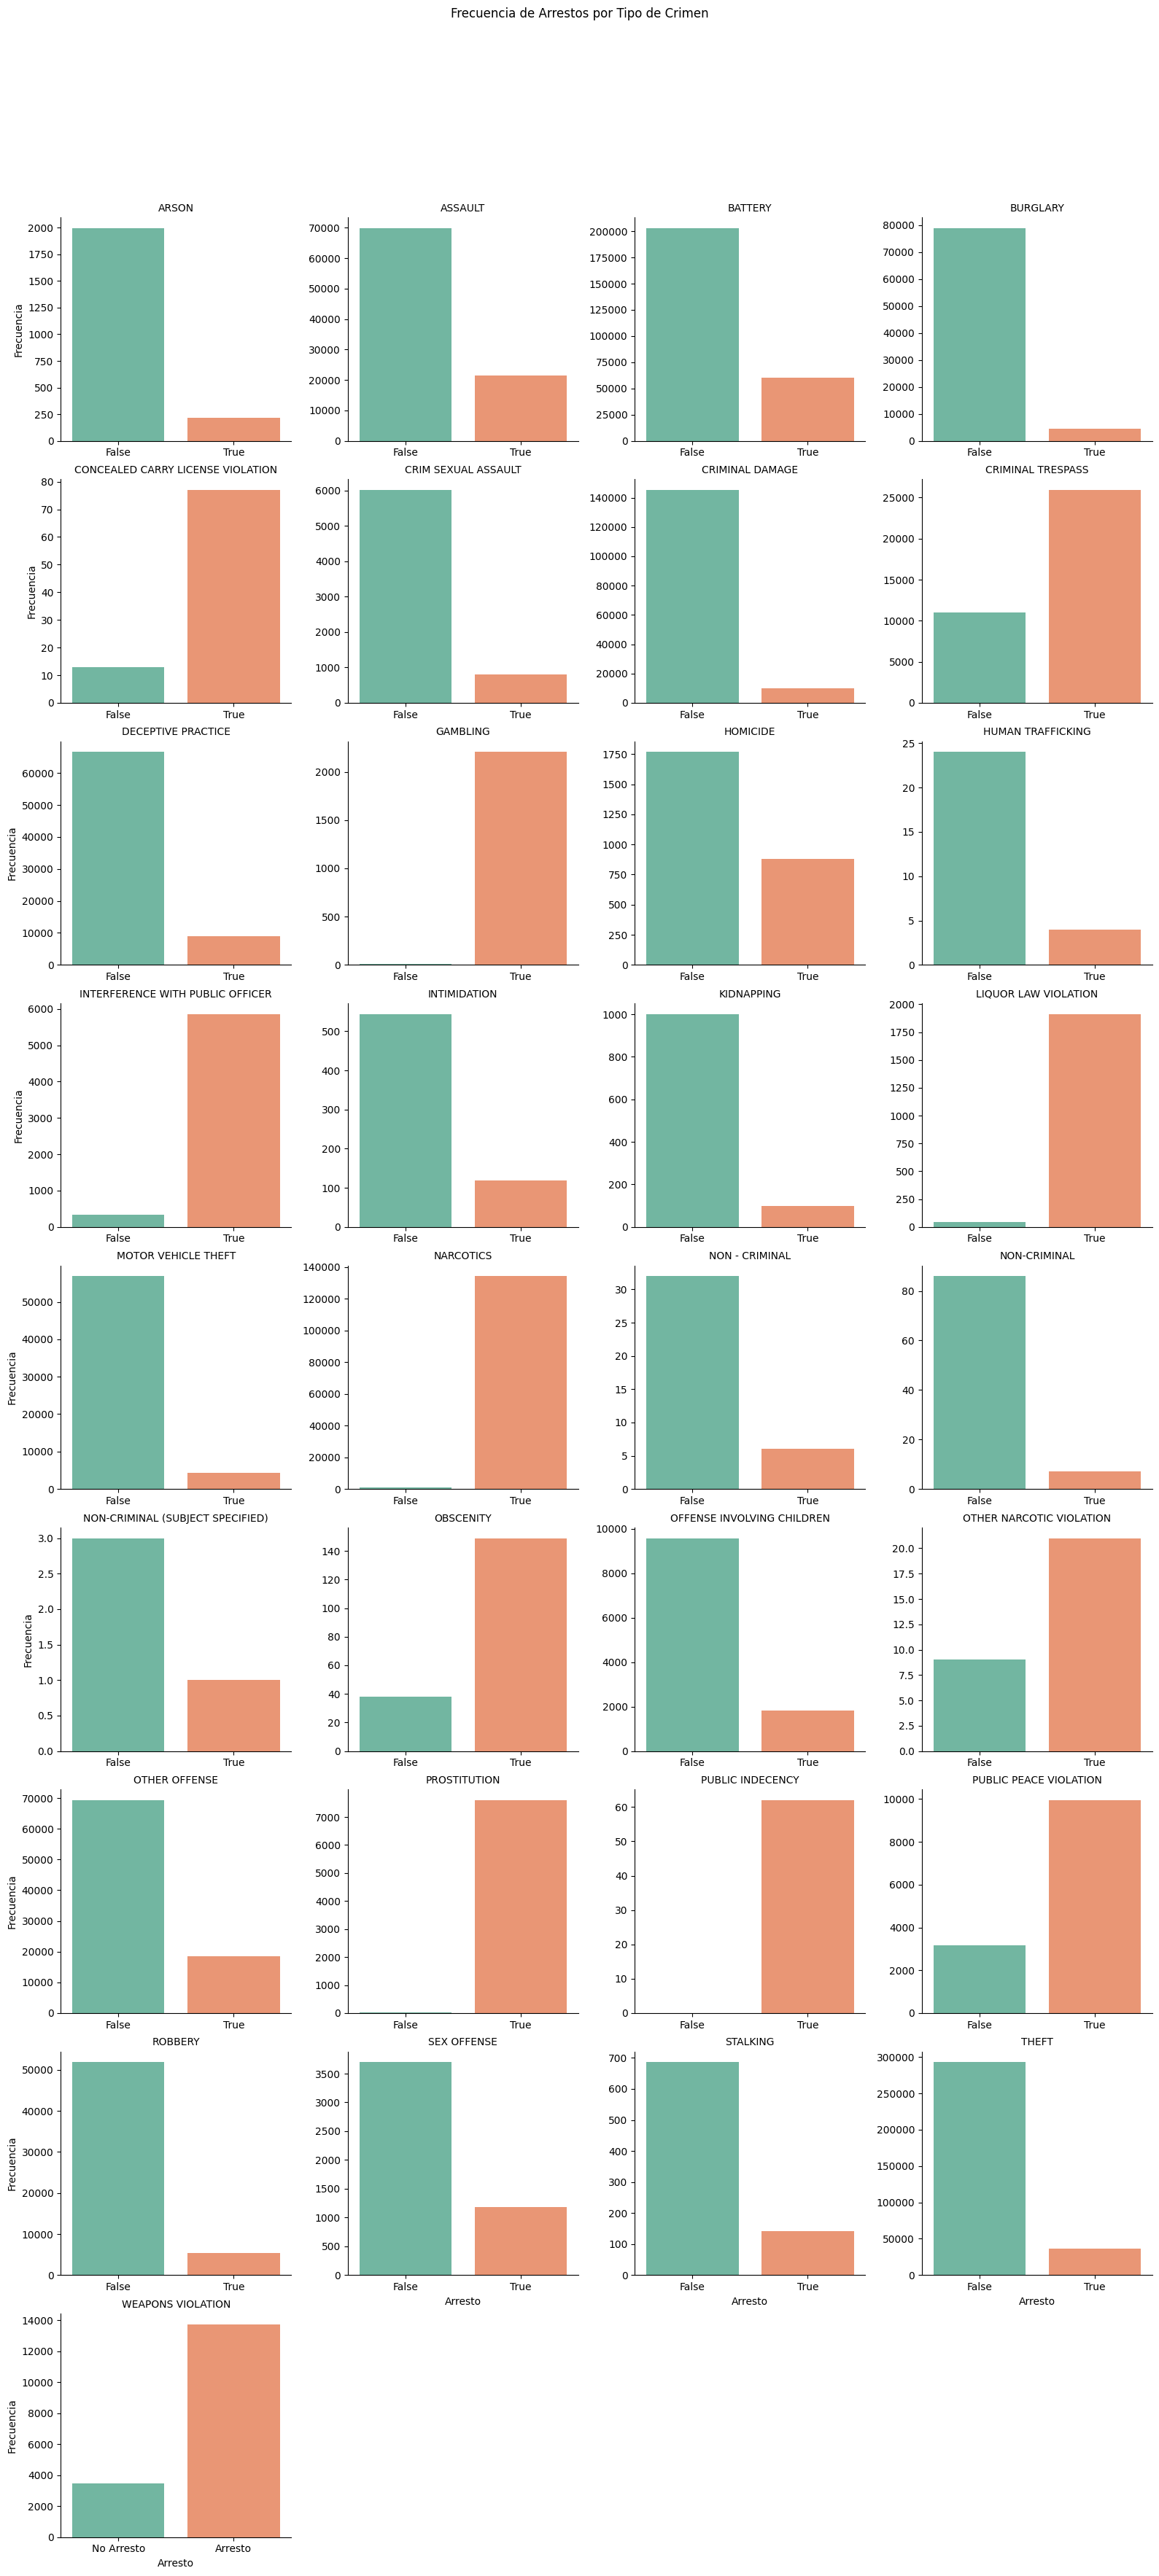

In [ ]:
filtered_data = dataset[['Primary Type', 'Arrest']]

grouped_data = dataset.groupby(['Primary Type', 'Arrest']).size().reset_index(name='Count')

g = sns.FacetGrid(grouped_data, col="Primary Type", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.barplot, "Arrest", "Count", order=[False, True], palette="Set2")

g.set_titles("{col_name}")
g.set_axis_labels("Arresto", "Frecuencia")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Frecuencia de Arrestos por Tipo de Crimen")
plt.xticks(ticks=[0, 1], labels=["No Arresto", "Arresto"])
plt.show()

### Distrubución de Crímenes Domésticos y No Domésticos por tipo de crimen

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

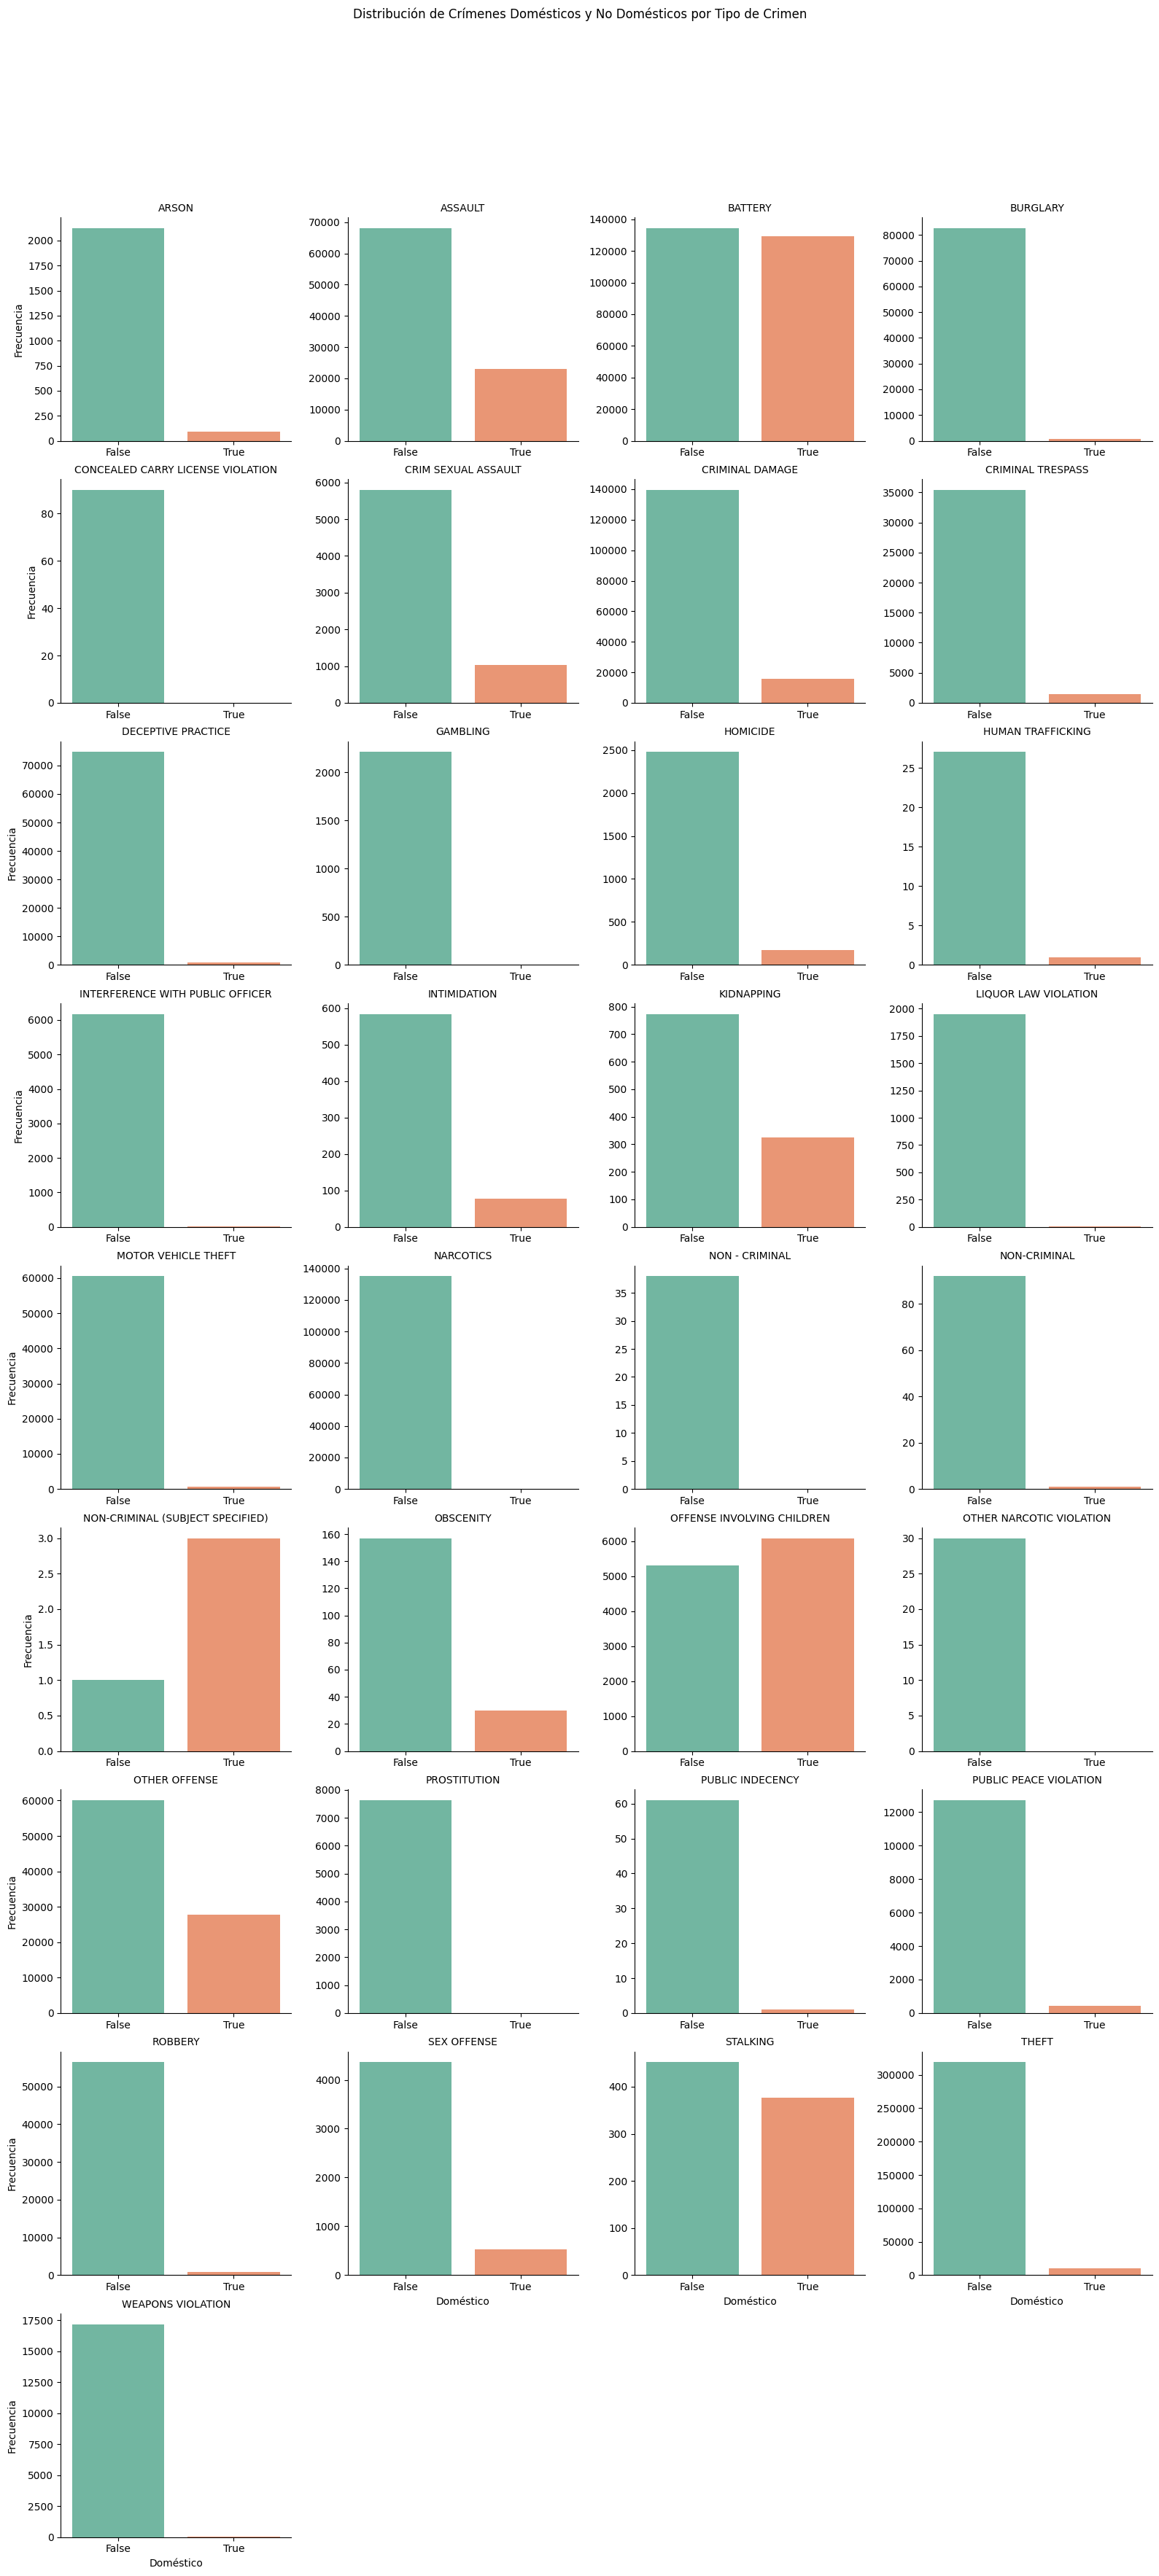

In [ ]:
grouped_data = dataset.groupby(['Primary Type', 'Domestic']).size().reset_index(name='Count')

g = sns.FacetGrid(grouped_data, col="Primary Type", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.barplot, "Domestic", "Count", order=[False, True], palette="Set2")

g.set_titles("{col_name}")
g.set_axis_labels("Doméstico", "Frecuencia")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Crímenes Domésticos y No Domésticos por Tipo de Crimen")
plt.show()

### Número de crímenes por año

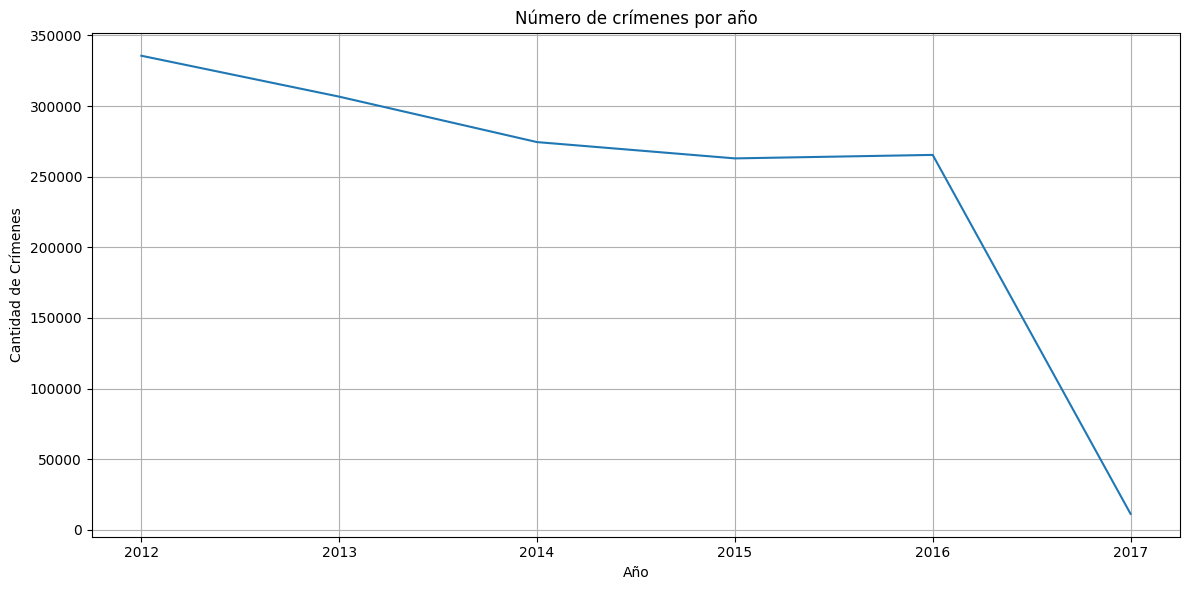

In [ ]:
crimes_per_year = dataset.groupby('Year').size()
plt.figure(figsize=(12, 6))
crimes_per_year.plot(kind='line')
plt.title('Número de crímenes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Crímenes')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
crimes_per_year = dataset['Year'].value_counts().sort_index()
print(crimes_per_year)

Year
2012    335670
2013    306703
2014    274527
2015    262995
2016    265462
2017     11357
Name: count, dtype: int64


### Distribución de crímenes por meses

<ipython-input-18-70e3111b71a0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month


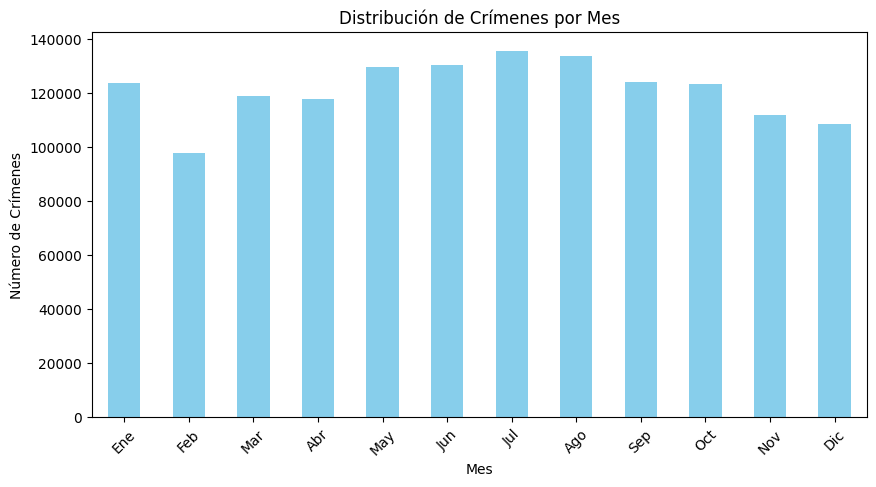

In [ ]:
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
crimes_per_month = dataset['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
crimes_per_month.plot(kind='bar', color='skyblue')
plt.title('Distribución de Crímenes por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Crímenes')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
plt.show()

### Matríz de correlación

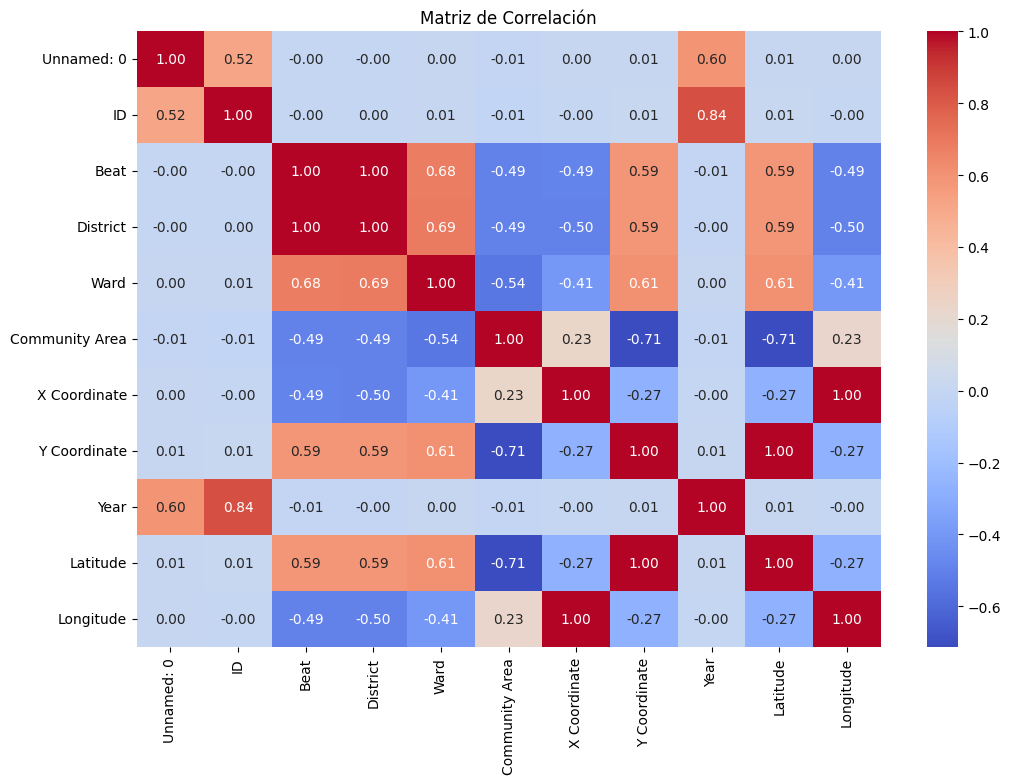

In [ ]:
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación")
plt.show()

### **Conclusiones del Análisis Exploratorio de Datos (EDA)**

1. **Resumen estadístico y análisis de las variables numéricas,** el análisis estadístico básico nos ha permitido identificar posibles valores atípicos y patrones en los datos, como rangos significativos en las coordenadas geográficas, años y áreas comunitarias.
2. **Datos únicos y duplicados,** el análisis de valores únicos y duplicados confirma la calidad general del dataset, aunque detectamos registros duplicados asociados a ciertos números de caso, probablemente debido a errores administrativos.
3. **Distribución y frecuencia de crímenes:**
  - La **distribución** de los tipos de crímenes nos mostrua que delitos como el robo y el daño criminal son los más comunes, mientras que otros como el homicidio tienen una incidencia menor.
  - La **frecuencia** de arrestos varía significativamente según el tipo de crimen, lo cual podría influir en la predicción de la probabilidad de arresto en futuros análisis.
4. **Variables categóricas,** desglose por categorías (crímenes domésticos/no domésticos, tipo de crimen, etc.) nos ha permitido entender mejor la composición del dataset, destacando que ciertos delitos están más relacionados con ambientes domésticos, lo que podría ser relevante para el modelo predictivo.
5. **Análisis temporal,** identificamos las tendencias anuales y mensuales en los datos. Algunos meses presentan una mayor incidencia de crímenes, lo que podría estar relacionado con factores estacionales o eventos específicos.
6. **Distribución geográfica,** las variables de latitud y longitud confirmamos la cobertura del dataset en un área específica. Esta información es esencial para modelar las características espaciales de los crímenes.
7. **Relaciones entre las variables,** la matriz de correlación destacamos la relación entre variables como las coordenadas geográficas y las áreas comunitarias. Sin embargo, no observamos correlaciones muy altas entre las variables numéricas, lo que sugiere que la predicción podría depender de una combinación compleja de factores.


# **3. Preprocesamiento**

Tratamiento de valores nulos. (Media, moda y mediana). (Moda -> Categoricas. Mediana y Media -> Númericas).  

Convertir variables númericas a "int" o "float" y las categoricas en "category". Aplicar dummies (one-hot encoding).

### Carga de los datos

Cargamos los datos para que podamos utilizar el dataset seleccionado y en base a las conclusiones que sacamos del analisis exploratorio de los datos realizar las mejores tecnicas de preprocesamiento.

1. Eliminamos columnas que no son interesantes de analisis para nuestro proyecto y que determinamos que no aportan valor.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML Proyecto/ML/NuevoProyecto/dataset/Chicago_Crimes_2012_to_2017.csv')
df = dataset.copy()

columns_to_drop = ['Unnamed: 0','ID', 'Case Number', 'IUCR', 'Beat','Ward', 'FBI Code','Updated On', 'Year', 'X Coordinate', 'Y Coordinate']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

2. Identificar y manejar valores nulos, verificar cuantos valores nulos hay por columna

In [ ]:
print("Valores nulos por columna antes del procesamiento:")
print(df.isnull().sum())

Valores nulos por columna antes del procesamiento:
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
District                    1
Community Area             40
Latitude                37083
Longitude               37083
Location                37083
dtype: int64


3. Rellenamos valores nulos para los atributos numericos, ya que nos interesa rellena los valores nulos con los valores que son mas repetitivos. La media no la vemos como una opcion ya que estamos hablando de latitudes y longitudes que pueden distorsionar nuestro analisis en la forma en la que identificamos los crimenes por localización.

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_median = SimpleImputer(strategy='median')
df[numeric_cols] = imputer_median.fit_transform(df[numeric_cols])

categorical_cols = df.select_dtypes(include=['object']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

In [ ]:
print("\nValores nulos por columna después del procesamiento:")
print(df.isnull().sum())


Valores nulos por columna después del procesamiento:
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Community Area          0
Latitude                0
Longitude               0
Location                0
dtype: int64


4. Realizamos dummies para aquellas variables que solamente tenian dos valores, en este caso Arrest y Domestic.

In [ ]:
df['Arrest'] = df['Arrest'].astype(int)
df['Domestic'] = df['Domestic'].astype(int)

encoder = OneHotEncoder(sparse_output=False)
encoded_features = pd.DataFrame(
    encoder.fit_transform(df[['Arrest', 'Domestic']]),
    columns=encoder.get_feature_names_out(['Arrest', 'Domestic']),
    index=df.index
)

df = pd.concat([df.drop(columns=['Arrest', 'Domestic']), encoded_features], axis=1)

print("\nDataset después del One-Hot Encoding:")
print(df.head())


Dataset después del One-Hot Encoding:
                     Date                Block            Primary Type  \
0  05/03/2016 11:40:00 PM   013XX S SAWYER AVE                 BATTERY   
1  05/03/2016 09:40:00 PM   061XX S DREXEL AVE                 BATTERY   
2  05/03/2016 11:31:00 PM  053XX W CHICAGO AVE  PUBLIC PEACE VIOLATION   
3  05/03/2016 10:10:00 PM    049XX W FULTON ST                 BATTERY   
4  05/03/2016 10:00:00 PM    003XX N LOTUS AVE                   THEFT   

               Description Location Description  District  Community Area  \
0  DOMESTIC BATTERY SIMPLE            APARTMENT      10.0            29.0   
1  DOMESTIC BATTERY SIMPLE            RESIDENCE       3.0            42.0   
2         RECKLESS CONDUCT               STREET      15.0            25.0   
3                   SIMPLE             SIDEWALK      15.0            25.0   
4           $500 AND UNDER            RESIDENCE      15.0            25.0   

    Latitude  Longitude                       Locatio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1456714 non-null  object 
 1   Block                 1456714 non-null  object 
 2   Primary Type          1456714 non-null  object 
 3   Description           1456714 non-null  object 
 4   Location Description  1456714 non-null  object 
 5   District              1456714 non-null  float64
 6   Community Area        1456714 non-null  float64
 7   Latitude              1456714 non-null  float64
 8   Longitude             1456714 non-null  float64
 9   Location              1456714 non-null  object 
 10  Arrest_0              1456714 non-null  float64
 11  Arrest_1              1456714 non-null  float64
 12  Domestic_0            1456714 non-null  float64
 13  Domestic_1            1456714 non-null  float64
dtypes: float64(8), object(6)
memory us

5. Convertir la fecha al formato de fecha y no como objeto


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print("\nColumnas convertidas a formato datetime:")
print(df[['Date']].head())

<ipython-input-26-90c9887e35e9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



Columnas convertidas a formato datetime:
                 Date
0 2016-05-03 23:40:00
1 2016-05-03 21:40:00
2 2016-05-03 23:31:00
3 2016-05-03 22:10:00
4 2016-05-03 22:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Date                  1456714 non-null  datetime64[ns]
 1   Block                 1456714 non-null  object        
 2   Primary Type          1456714 non-null  object        
 3   Description           1456714 non-null  object        
 4   Location Description  1456714 non-null  object        
 5   District              1456714 non-null  float64       
 6   Community Area        1456714 non-null  float64       
 7   Latitude              1456714 non-null  float64       
 8   Longitude             1456714 non-null  float64       
 9   Location              1456714 non-null  object        
 10  Arrest_0              1456714 non-null  float64       
 11  Arrest_1              1456714 non-null  float64       
 12  Domestic_0            1456714 non-null  fl

6. Convertir variables categoricas a tipo category y las tipo numericas a ints.

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols] = df[numeric_cols].astype(int)

print("\nTipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos después de la conversión:
Date                    datetime64[ns]
Block                         category
Primary Type                  category
Description                   category
Location Description          category
District                         int64
Community Area                   int64
Latitude                         int64
Longitude                        int64
Location                      category
Arrest_0                         int64
Arrest_1                         int64
Domestic_0                       int64
Domestic_1                       int64
dtype: object


7. Simplificamos las variables de Primary Type para no tener tantos valores.


In [ ]:
category_mapping = {
    'ARSON': 'PROPERTY CRIME',
    'ASSAULT': 'VIOLENT CRIME',
    'BATTERY': 'VIOLENT CRIME',
    'BURGLARY': 'PROPERTY CRIME',
    'CONCEALED CARRY LICENSE VIOLATION': 'WEAPONS OFFENSE',
    'CRIM SEXUAL ASSAULT': 'VIOLENT CRIME',
    'CRIMINAL DAMAGE': 'PROPERTY CRIME',
    'CRIMINAL TRESPASS': 'PROPERTY CRIME',
    'DECEPTIVE PRACTICE': 'FRAUD',
    'GAMBLING': 'OTHER OFFENSE',
    'HOMICIDE': 'VIOLENT CRIME',
    'HUMAN TRAFFICKING': 'VIOLENT CRIME',
    'INTERFERENCE WITH PUBLIC OFFICER': 'OTHER OFFENSE',
    'INTIMIDATION': 'VIOLENT CRIME',
    'KIDNAPPING': 'VIOLENT CRIME',
    'LIQUOR LAW VIOLATION': 'OTHER OFFENSE',
    'MOTOR VEHICLE THEFT': 'PROPERTY CRIME',
    'NARCOTICS': 'DRUG OFFENSE',
    'NON-CRIMINAL': 'NON-CRIMINAL',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',
    'OBSCENITY': 'OTHER OFFENSE',
    'OFFENSE INVOLVING CHILDREN': 'VIOLENT CRIME',
    'OTHER NARCOTIC VIOLATION': 'DRUG OFFENSE',
    'OTHER OFFENSE': 'OTHER OFFENSE',
    'PROSTITUTION': 'OTHER OFFENSE',
    'PUBLIC INDECENCY': 'OTHER OFFENSE',
    'PUBLIC PEACE VIOLATION': 'OTHER OFFENSE',
    'ROBBERY': 'VIOLENT CRIME',
    'SEX OFFENSE': 'VIOLENT CRIME',
    'STALKING': 'VIOLENT CRIME',
    'THEFT': 'PROPERTY CRIME',
    'WEAPONS VIOLATION': 'WEAPONS OFFENSE'
}

df['Primary Type Grouped'] = df['Primary Type'].map(category_mapping)

print(df['Primary Type Grouped'].value_counts())


Primary Type Grouped
PROPERTY CRIME     668579
VIOLENT CRIME      440674
DRUG OFFENSE       135270
OTHER OFFENSE      119238
FRAUD               75495
WEAPONS OFFENSE     17323
NON-CRIMINAL           97
Name: count, dtype: int64


In [ ]:
df.head(5)

Date                Block            Primary Type  \
0 2016-05-03 23:40:00   013XX S SAWYER AVE                 BATTERY   
1 2016-05-03 21:40:00   061XX S DREXEL AVE                 BATTERY   
2 2016-05-03 23:31:00  053XX W CHICAGO AVE  PUBLIC PEACE VIOLATION   
3 2016-05-03 22:10:00    049XX W FULTON ST                 BATTERY   
4 2016-05-03 22:00:00    003XX N LOTUS AVE                   THEFT   

               Description Location Description  District  Community Area  \
0  DOMESTIC BATTERY SIMPLE            APARTMENT        10              29   
1  DOMESTIC BATTERY SIMPLE            RESIDENCE         3              42   
2         RECKLESS CONDUCT               STREET        15              25   
3                   SIMPLE             SIDEWALK        15              25   
4           $500 AND UNDER            RESIDENCE        15              25   

   Latitude  Longitude                       Location  Arrest_0  Arrest_1  \
0        41        -87  (41.864073157, -87.706818608)         0         1   
1        41        -87   (41.782921527, -87.60436317)         1         0   
2        41        -87  (41.894908283, -87.758371958)         1         0   
3        41        -87  (41.885686845, -87.749515983)         1         0   
4        41        -87  (41.886297242, -87.761750709)         1         0   

   Domestic_0  Domestic_1 Primary Type Grouped  
0           0           1        VIOLENT CRIME  
1           0           1        VIOLENT CRIME  
2           1           0        OTHER OFFENSE  
3           1           0        VIOLENT CRIME  
4           0           1       PROPERTY CRIME

In [ ]:
new_column_to_drop_pt = ['Primary Type']
df = df.drop(columns=[col for col in new_column_to_drop_pt if col in df.columns])

In [ ]:
df.rename(columns={'Primary Type Grouped': 'Primary Type'}, inplace=True)

df.head()


Date                Block              Description  \
0 2016-05-03 23:40:00   013XX S SAWYER AVE  DOMESTIC BATTERY SIMPLE   
1 2016-05-03 21:40:00   061XX S DREXEL AVE  DOMESTIC BATTERY SIMPLE   
2 2016-05-03 23:31:00  053XX W CHICAGO AVE         RECKLESS CONDUCT   
3 2016-05-03 22:10:00    049XX W FULTON ST                   SIMPLE   
4 2016-05-03 22:00:00    003XX N LOTUS AVE           $500 AND UNDER   

  Location Description  District  Community Area  Latitude  Longitude  \
0            APARTMENT        10              29        41        -87   
1            RESIDENCE         3              42        41        -87   
2               STREET        15              25        41        -87   
3             SIDEWALK        15              25        41        -87   
4            RESIDENCE        15              25        41        -87   

                        Location  Arrest_0  Arrest_1  Domestic_0  Domestic_1  \
0  (41.864073157, -87.706818608)         0         1           0           1   
1   (41.782921527, -87.60436317)         1         0           0           1   
2  (41.894908283, -87.758371958)         1         0           1           0   
3  (41.885686845, -87.749515983)         1         0           1           0   
4  (41.886297242, -87.761750709)         1         0           0           1   

     Primary Type  
0   VIOLENT CRIME  
1   VIOLENT CRIME  
2   OTHER OFFENSE  
3   VIOLENT CRIME  
4  PROPERTY CRIME

In [ ]:
df.to_csv('/content/drive/MyDrive/ML Proyecto/ML/NuevoProyecto/dataset/CrimenLimpio.csv')

### **Conclusiones**

1. **Eliminación de columnas irrelevantes,** decidimos eliminar las columnas  Unnamed: 0, ID, CASE NUMBER, IUCR, Beat, Ward, FBI Code, X Coordinates, Y Coordinates, Updated On y Year porque no aportaban valor significativo al objetivo del proyecto. Estas columnas contenían identificadores únicos, códigos redundantes o información duplicada que no contribuiría a la predicción de crímenes violentos.
2. **Tratamiento de valores nulos,** los valores nulos en las variables numéricas se rellenaron utilizando valores relevantes (moda o mediana) para evitar distorsiones en el análisis, especialmente en atributos como Latitude y Longitude. Se evitó usar la media, ya que podría afectar negativamente la precisión del análisis de localización.
3. **Conversión de tipos de datos,** las columnas numéricas las convertimos a tipos int o float para asegurar un correcto manejo en el modelo. Las variables categóricas se transformaron al tipo category para optimizar el almacenamiento y facilitar su uso en el procesamiento.
4. **Codificación de variables categóricas,** aplicamos one-hot encoding (creación de dummies) a las variables categóricas con dos valores (Arrest y Domestic), para posteriormente facilitar su implementación en el modelo de predicción.
5. **Conversión y estandarización de fechas,** la columna Date fue convertida al formato de fecha para mejorar su manejo y permitir análisis temporales más precisos.
6. **Normalización de columnas,** las variables seleccionadas fueron normalizadas para garantizar una escala consistente y mejorar el rendimiento del modelo en el futuro.
7. **Agrupacion de la variable objetivo,** simplificamos las variables de Primary Type para no tener tantos valores.
8. **Decisiones justificadas,** cada paso del preprocesamiento se basó en las conclusiones del análisis exploratorio, priorizando la eliminación de redundancias, la optimización del dataset y la preparación de los datos para un análisis más eficiente y robusto.

# **4. Extracción de KPIs**

Analizar el contenido de cada variable y visualizarla gráficamente despues del preprocesamiento.

### Carga de los datos


In [ ]:
dataL = pd.read_csv('/content/drive/MyDrive/ML Proyecto/ML/NuevoProyecto/dataset/CrimenLimpio.csv')


In [ ]:
dataL.head()

Unnamed: 0                 Date                Block  \
0           0  2016-05-03 23:40:00   013XX S SAWYER AVE   
1           1  2016-05-03 21:40:00   061XX S DREXEL AVE   
2           2  2016-05-03 23:31:00  053XX W CHICAGO AVE   
3           3  2016-05-03 22:10:00    049XX W FULTON ST   
4           4  2016-05-03 22:00:00    003XX N LOTUS AVE   

               Description Location Description  District  Community Area  \
0  DOMESTIC BATTERY SIMPLE            APARTMENT        10              29   
1  DOMESTIC BATTERY SIMPLE            RESIDENCE         3              42   
2         RECKLESS CONDUCT               STREET        15              25   
3                   SIMPLE             SIDEWALK        15              25   
4           $500 AND UNDER            RESIDENCE        15              25   

   Latitude  Longitude                       Location  Arrest_0  Arrest_1  \
0        41        -87  (41.864073157, -87.706818608)         0         1   
1        41        -87   (41.782921527, -87.60436317)         1         0   
2        41        -87  (41.894908283, -87.758371958)         1         0   
3        41        -87  (41.885686845, -87.749515983)         1         0   
4        41        -87  (41.886297242, -87.761750709)         1         0   

   Domestic_0  Domestic_1    Primary Type  
0           0           1   VIOLENT CRIME  
1           0           1   VIOLENT CRIME  
2           1           0   OTHER OFFENSE  
3           1           0   VIOLENT CRIME  
4           0           1  PROPERTY CRIME

In [ ]:
dataL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Unnamed: 0            1456714 non-null  int64 
 1   Date                  1456714 non-null  object
 2   Block                 1456714 non-null  object
 3   Description           1456714 non-null  object
 4   Location Description  1456714 non-null  object
 5   District              1456714 non-null  int64 
 6   Community Area        1456714 non-null  int64 
 7   Latitude              1456714 non-null  int64 
 8   Longitude             1456714 non-null  int64 
 9   Location              1456714 non-null  object
 10  Arrest_0              1456714 non-null  int64 
 11  Arrest_1              1456714 non-null  int64 
 12  Domestic_0            1456714 non-null  int64 
 13  Domestic_1            1456714 non-null  int64 
 14  Primary Type          1456676 non-null  object
dty

### Crimenes julio 2012

In [ ]:
dataL['Date'] = pd.to_datetime(dataL['Date'])
data_2012 = dataL[dataL['Date'].dt.year == 2012]

data_2012['Month'] = data_2012['Date'].dt.month
month_with_most_crimes = data_2012['Month'].value_counts().idxmax()
data_2012_month = data_2012[data_2012['Month'] == month_with_most_crimes]

<ipython-input-37-b46d31ddc275>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2012['Month'] = data_2012['Date'].dt.month


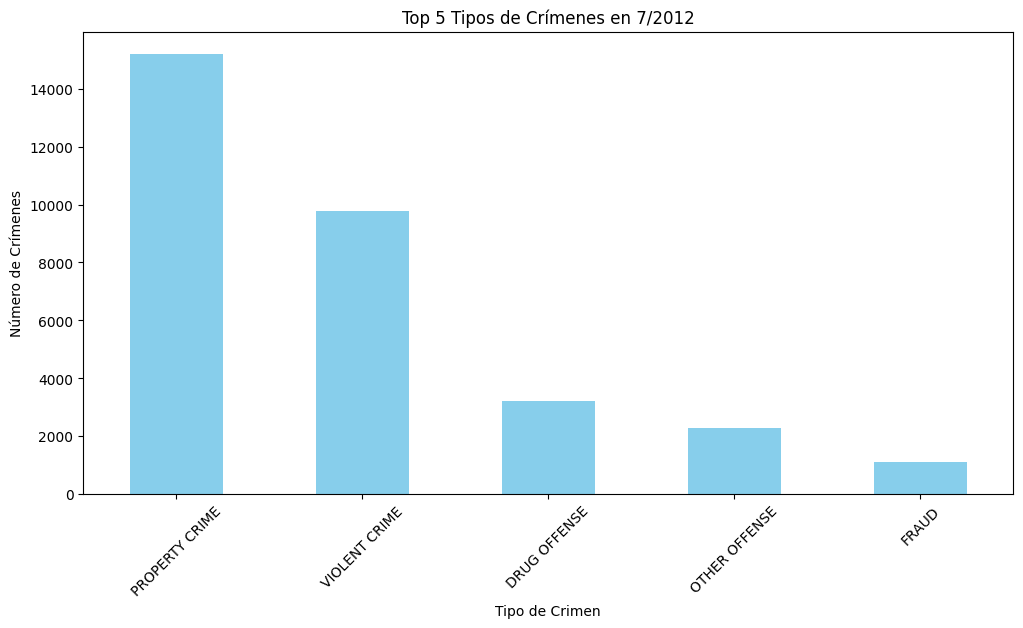

In [ ]:
plt.figure(figsize=(12, 6))
data_2012_month['Primary Type'].value_counts().head(5).plot(kind='bar', color='skyblue')
plt.title(f'Top 5 Tipos de Crímenes en {month_with_most_crimes}/2012')
plt.xlabel('Tipo de Crimen')
plt.ylabel('Número de Crímenes')
plt.xticks(rotation=45)
plt.show()

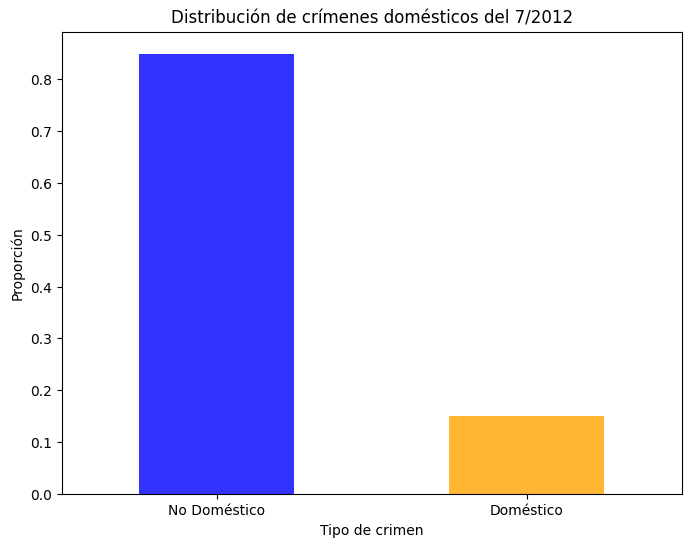

In [ ]:
domestic_data = data_2012_month['Domestic_1'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
domestic_data.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.title('Distribución de crímenes domésticos del 7/2012')
plt.xticks([0, 1], ['No Doméstico', 'Doméstico'], rotation=0)
plt.ylabel('Proporción')
plt.xlabel('Tipo de crimen')
plt.show()

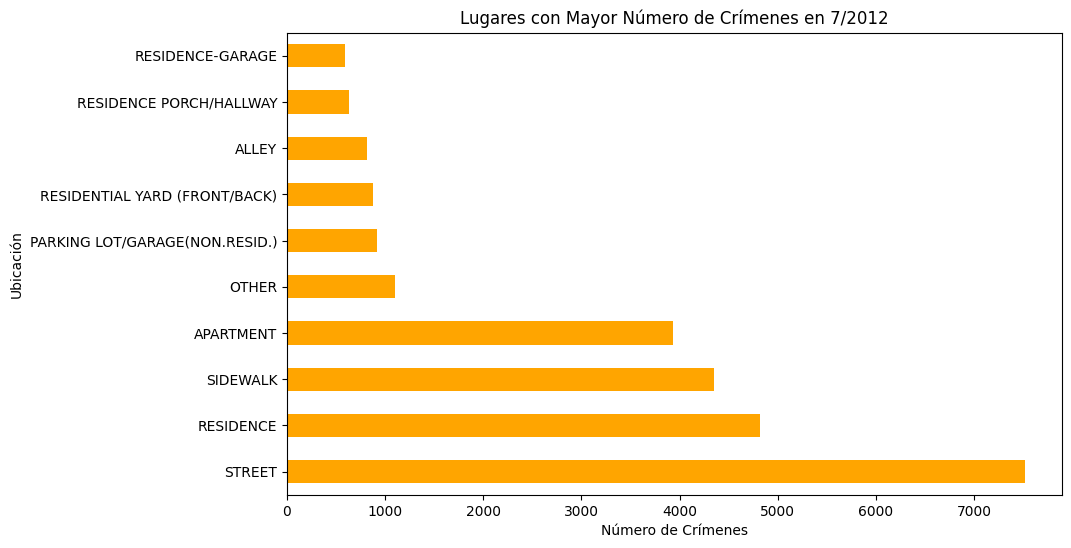

In [ ]:
plt.figure(figsize=(10, 6))
data_2012_month['Location Description'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title(f'Lugares con Mayor Número de Crímenes en {month_with_most_crimes}/2012')
plt.xlabel('Número de Crímenes')
plt.ylabel('Ubicación')
plt.show()

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
july_2012_data = dataset[(dataset['Date'].dt.year == 2012) & (dataset['Date'].dt.month == 7)]

m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in july_2012_data.dropna(subset=['Latitude', 'Longitude']).iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Tipo: {row['Primary Type']}, Descripción: {row['Description']}, Fecha: {row['Date']}"
    ).add_to(marker_cluster)

m.save("/content/drive/MyDrive/ML Proyecto/ML/NuevoProyecto/dataset/Crimes_July_2012_Chicago.html")

print("El mapa ha sido guardado como 'Crimes_July_2012_Chicago.html'. Ábrelo en un navegador para visualizarlo.")

<ipython-input-41-1ac7ee7043d0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Date'] = pd.to_datetime(dataset['Date'])


El mapa ha sido guardado como 'Crimes_July_2012_Chicago.html'. Ábrelo en un navegador para visualizarlo.


### Horarios con mayor incidencia de crímenes: Identifica las horas con mayor frecuencia de crímenes y lo representa en un gráfico de barras.



Frecuencia de crímenes por hora del día:
Hour
0     71288
1     43771
2     37689
3     31048
4     23325
5     20233
6     24609
7     34522
8     50637
9     67712
10    65006
11    67005
12    83930
13    69666
14    73698
15    79930
16    76065
17    75556
18    82414
19    84193
20    80826
21    76543
22    75824
23    61224
Name: count, dtype: int64


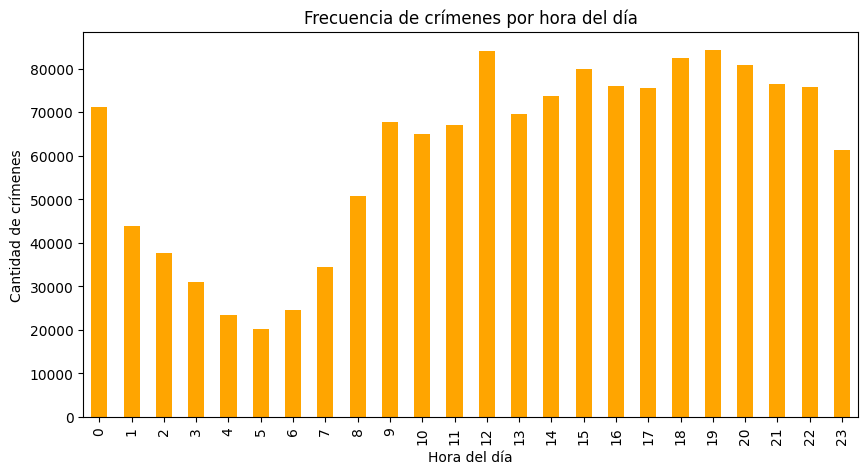

In [ ]:
dataL['Hour'] = pd.to_datetime(dataL['Date']).dt.hour
crime_hours = dataL['Hour'].value_counts().sort_index()
print("\nFrecuencia de crímenes por hora del día:")
print(crime_hours)

plt.figure(figsize=(10, 5))
crime_hours.plot(kind='bar', title='Frecuencia de crímenes por hora del día', color='orange')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de crímenes')
plt.show()

### Tipos de crímenes más comunes en áreas residenciales: Filtra crímenes que ocurrieron en ubicaciones residenciales y analiza sus tipos más comunes.



Tipos de crímenes más comunes en áreas residenciales:
Primary Type
PROPERTY CRIME     21484
VIOLENT CRIME       8259
DRUG OFFENSE        2294
OTHER OFFENSE       1211
WEAPONS OFFENSE      901
FRAUD                117
Name: count, dtype: int64


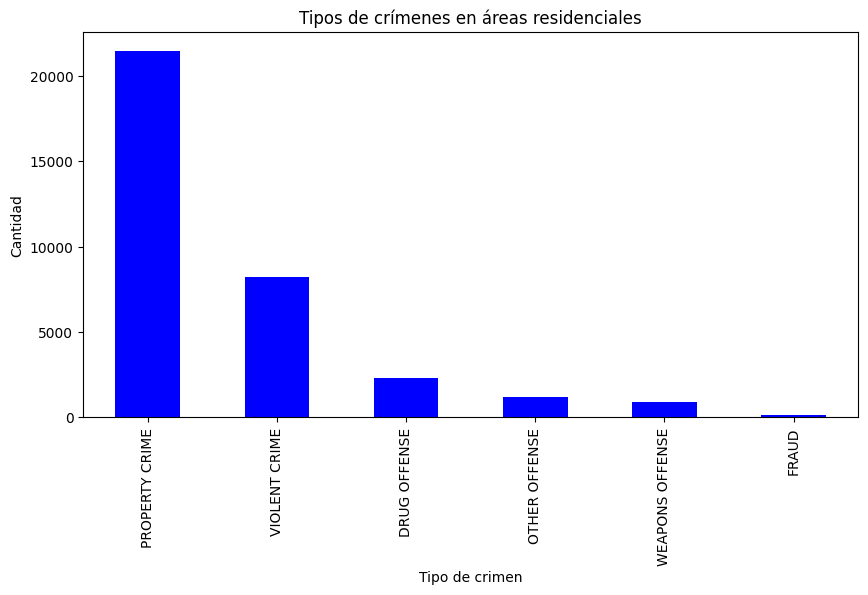

In [ ]:
residential_crimes = dataL[dataL['Location Description'].str.contains('residential', case=False, na=False)]
common_residential_crimes = residential_crimes['Primary Type'].value_counts().head(10)
print("\nTipos de crímenes más comunes en áreas residenciales:")
print(common_residential_crimes)

plt.figure(figsize=(10, 5))
common_residential_crimes.plot(kind='bar', title='Tipos de crímenes en áreas residenciales', color='blue')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()


Tipos de crímenes más comunes en aceras:
Primary Type
VIOLENT CRIME      80592
DRUG OFFENSE       46019
PROPERTY CRIME     17196
OTHER OFFENSE      12028
WEAPONS OFFENSE     3495
FRAUD               1549
NON-CRIMINAL          12
Name: count, dtype: int64


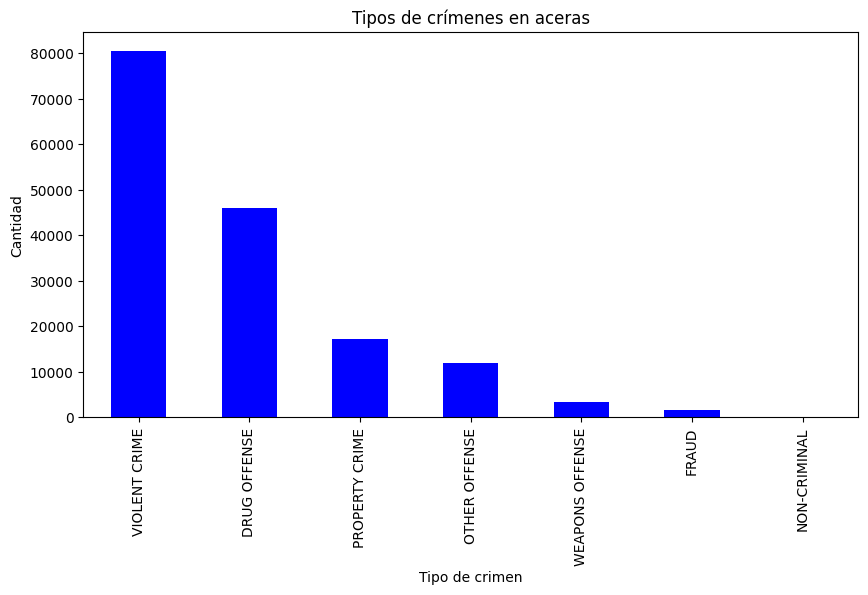

In [ ]:
residential_crimes = dataL[dataL['Location Description'].str.contains('sidewalk', case=False, na=False)]
common_residential_crimes = residential_crimes['Primary Type'].value_counts().head(10)
print("\nTipos de crímenes más comunes en aceras:")
print(common_residential_crimes)

plt.figure(figsize=(10, 5))
common_residential_crimes.plot(kind='bar', title='Tipos de crímenes en aceras', color='blue')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

### Relación entre arrestos y tipos de crímenes: Calcula la tasa de arresto (promedio) para cada tipo de crimen.



Tasa de arrestos por tipo de crimen:
Primary Type
DRUG OFFENSE       0.993110
WEAPONS OFFENSE    0.797956
OTHER OFFENSE      0.388383
VIOLENT CRIME      0.209611
PROPERTY CRIME     0.122199
FRAUD              0.118114
NON-CRIMINAL       0.082474
Name: Arrest_1, dtype: float64


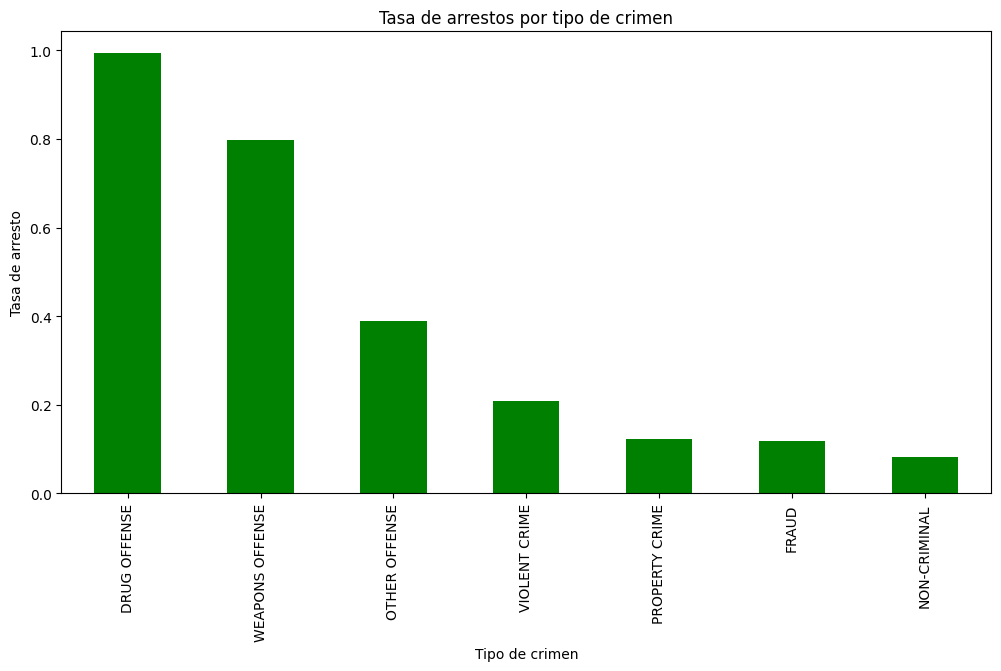

In [ ]:
arrest_rates = dataL.groupby('Primary Type')['Arrest_1'].mean().sort_values(ascending=False)
print("\nTasa de arrestos por tipo de crimen:")
print(arrest_rates)

plt.figure(figsize=(12, 6))
arrest_rates.plot(kind='bar', title='Tasa de arrestos por tipo de crimen', color='green')
plt.xlabel('Tipo de crimen')
plt.ylabel('Tasa de arresto')
plt.show()

### Incidencia de crímenes domésticos: Analiza la proporción de crímenes relacionados con violencia doméstica.


In [ ]:
domestic_crimes = dataL['Domestic_1'].sum()
arrest_crimes = dataL['Arrest_1'].sum()
total_crimes = len(dataL)
total_arrest = len(dataL)
domestic_ratio = domestic_crimes / total_crimes
arrest_ratio = arrest_crimes / total_arrest
print(f"Crímenes domésticos: {domestic_crimes}")
print(f"Proporción de crímenes domésticos: {domestic_ratio:.2%}\n")
print(f"Arrestos: {arrest_crimes}")
print(f"Proporción de arrestos: {arrest_ratio:.2%}")

Crímenes domésticos: 220054
Proporción de crímenes domésticos: 15.11%

Arrestos: 377472
Proporción de arrestos: 25.91%


In [ ]:
domestic_crimes = dataL[dataL['Domestic_1'] == 1]

domestic_arrests = domestic_crimes[domestic_crimes['Arrest_1'] == 1].shape[0]

print(f"Cantidad de crímenes domésticos que terminaron en arresto: {domestic_arrests}")

if domestic_crimes.shape[0] > 0:
    domestic_arrest_ratio = domestic_arrests / domestic_crimes.shape[0]
    print(f"Proporción de crímenes domésticos que terminaron en arresto: {domestic_arrest_ratio:.2%}")
else:
    print("No hay crímenes domésticos en el dataset.")

Cantidad de crímenes domésticos que terminaron en arresto: 42700
Proporción de crímenes domésticos que terminaron en arresto: 19.40%


### Zonas con mayor variabilidad en tipos de crímenes: Identifica las áreas comunitarias donde ocurren más tipos diferentes de crímenes.


Zonas con mayor variabilidad en tipos de crímenes:
Block
010XX S MONITOR AVE          7
006XX N STATE ST             7
031XX N LAKE SHORE DR        7
045XX N CLARENDON AVE        7
051XX S ASHLAND AVE          7
004XX W NORTH AVE            7
035XX S MICHIGAN AVE         7
002XX W ONTARIO ST           7
046XX N BROADWAY             7
035XX S COTTAGE GROVE AVE    7
Name: Primary Type, dtype: int64


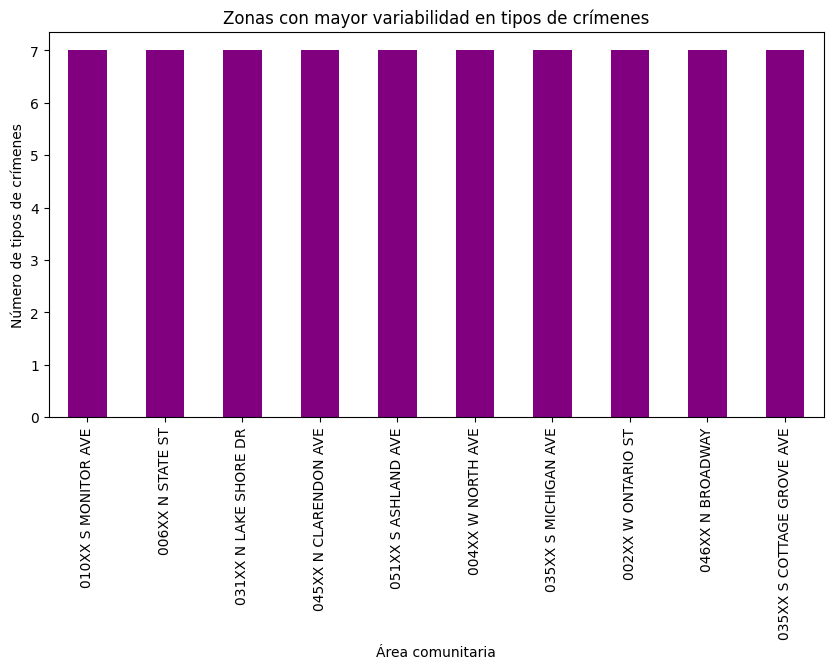

In [ ]:
crime_variability = dataL.groupby('Block')['Primary Type'].nunique().sort_values(ascending=False)
print("\nZonas con mayor variabilidad en tipos de crímenes:")
print(crime_variability.head(10))

plt.figure(figsize=(10, 5))
crime_variability.head(10).plot(kind='bar', title='Zonas con mayor variabilidad en tipos de crímenes', color='purple')
plt.xlabel('Área comunitaria')
plt.ylabel('Número de tipos de crímenes')
plt.show()

### Cambios en la criminalidad tras eventos específicos: Compara la frecuencia de crímenes antes y después de un evento específico, como un festival.




Crímenes entre 2015-11-27 y 2015-11-29: 1267

Tipos de crímenes más comunes durante el evento:
Primary Type
PROPERTY CRIME    639
VIOLENT CRIME     380
OTHER OFFENSE      82
DRUG OFFENSE       78
FRAUD              76
Name: count, dtype: int64


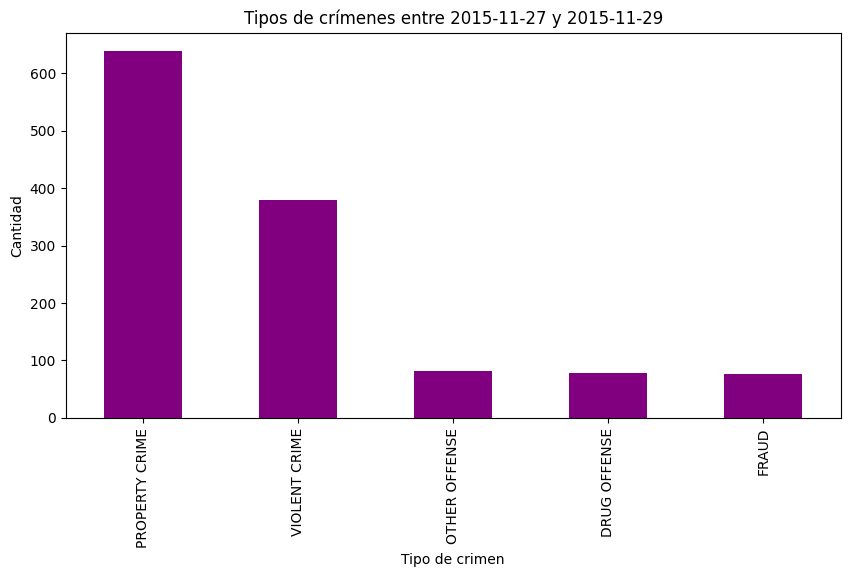


Crímenes entre 2014-11-27 y 2014-11-29: 1051

Tipos de crímenes más comunes durante el evento:
Primary Type
PROPERTY CRIME    490
VIOLENT CRIME     358
DRUG OFFENSE       83
OTHER OFFENSE      67
FRAUD              43
Name: count, dtype: int64


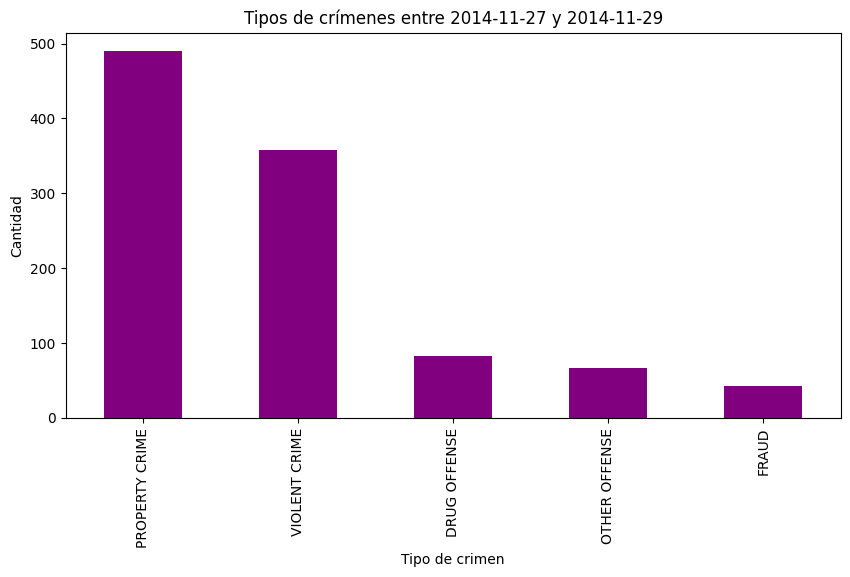


Crímenes entre 2013-11-27 y 2013-11-29: 1296

Tipos de crímenes más comunes durante el evento:
Primary Type
PROPERTY CRIME    641
VIOLENT CRIME     369
DRUG OFFENSE      124
OTHER OFFENSE     107
FRAUD              49
Name: count, dtype: int64


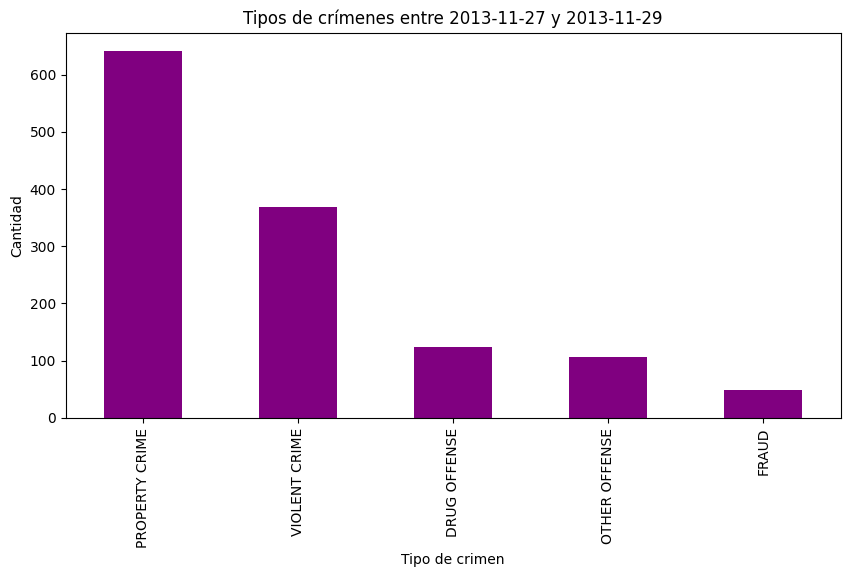

In [ ]:
#thanksgiving

start_date1 = '2015-11-27'
end_date1 = '2015-11-29'

start_date2 = '2014-11-27'
end_date2 = '2014-11-29'

start_date3 = '2013-11-27'
end_date3 = '2013-11-29'

event_crimes1 = dataL[(dataL['Date'] >= start_date1) & (dataL['Date'] < end_date1)]
event_crimes2 = dataL[(dataL['Date'] >= start_date2) & (dataL['Date'] < end_date2)]
event_crimes3 = dataL[(dataL['Date'] >= start_date3) & (dataL['Date'] < end_date3)]


event_crime_count1 = event_crimes1.shape[0]
event_crime_count2 = event_crimes2.shape[0]
event_crime_count3 = event_crimes3.shape[0]


event_crime_types1 = event_crimes1['Primary Type'].value_counts().head(5)
event_crime_types2 = event_crimes2['Primary Type'].value_counts().head(5)
event_crime_types3 = event_crimes3['Primary Type'].value_counts().head(5)


print(f"\nCrímenes entre {start_date1} y {end_date1}: {event_crime_count1}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types1)


plt.figure(figsize=(10, 5))
event_crime_types1.plot(kind='bar', title=f'Tipos de crímenes entre {start_date1} y {end_date1}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

print(f"\nCrímenes entre {start_date2} y {end_date2}: {event_crime_count2}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types2)

plt.figure(figsize=(10, 5))
event_crime_types2.plot(kind='bar', title=f'Tipos de crímenes entre {start_date2} y {end_date2}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

print(f"\nCrímenes entre {start_date3} y {end_date3}: {event_crime_count3}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types3)

plt.figure(figsize=(10, 5))
event_crime_types3.plot(kind='bar', title=f'Tipos de crímenes entre {start_date3} y {end_date3}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()


Crímenes entre 2015-07-04 y 2015-07-06: 1739

Tipos de crímenes más comunes durante el evento:
Primary Type
PROPERTY CRIME    770
VIOLENT CRIME     659
OTHER OFFENSE     118
DRUG OFFENSE      115
FRAUD              45
Name: count, dtype: int64


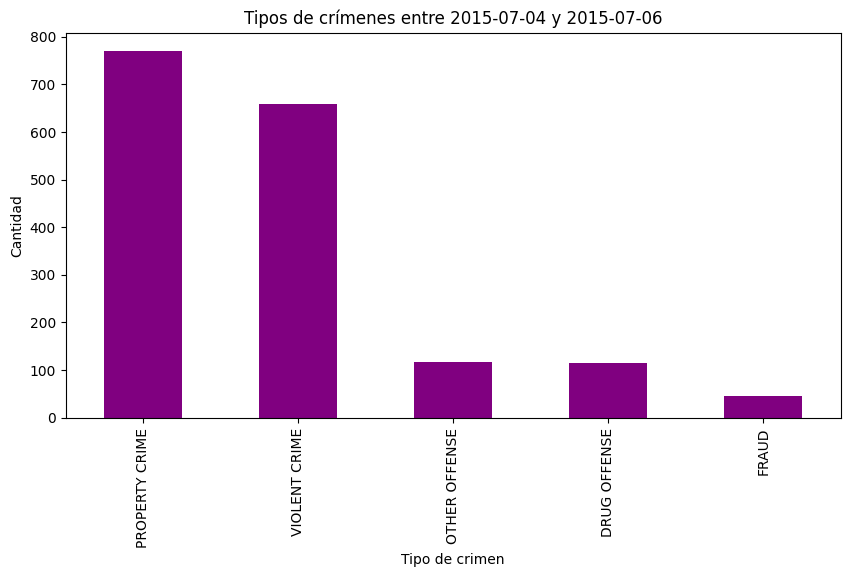


Crímenes entre 2014-07-04 y 2014-07-06: 1735

Tipos de crímenes más comunes durante el evento:
Primary Type
PROPERTY CRIME    746
VIOLENT CRIME     596
DRUG OFFENSE      166
OTHER OFFENSE     136
FRAUD              63
Name: count, dtype: int64


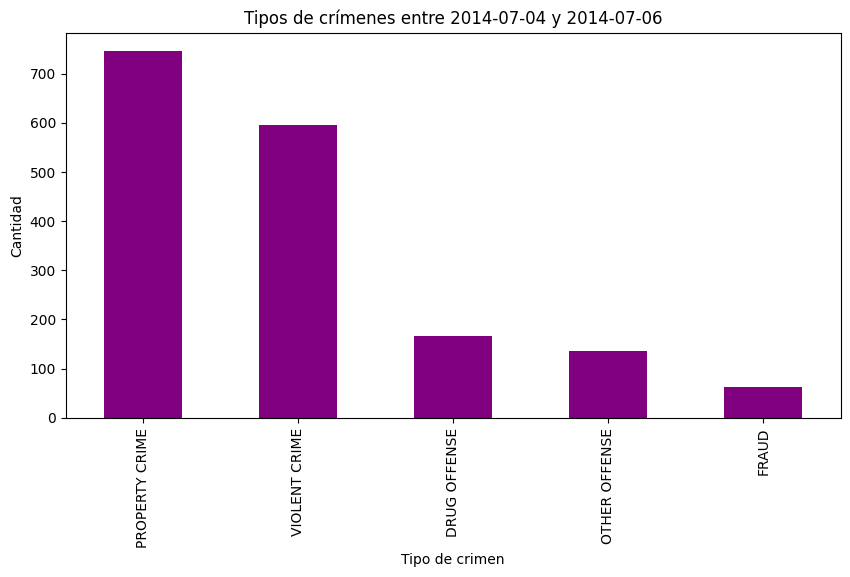


Crímenes entre 2013-07-04 y 2013-07-06: 1936

Tipos de crímenes más comunes durante el evento:
Primary Type
PROPERTY CRIME    800
VIOLENT CRIME     700
DRUG OFFENSE      201
OTHER OFFENSE     158
FRAUD              52
Name: count, dtype: int64


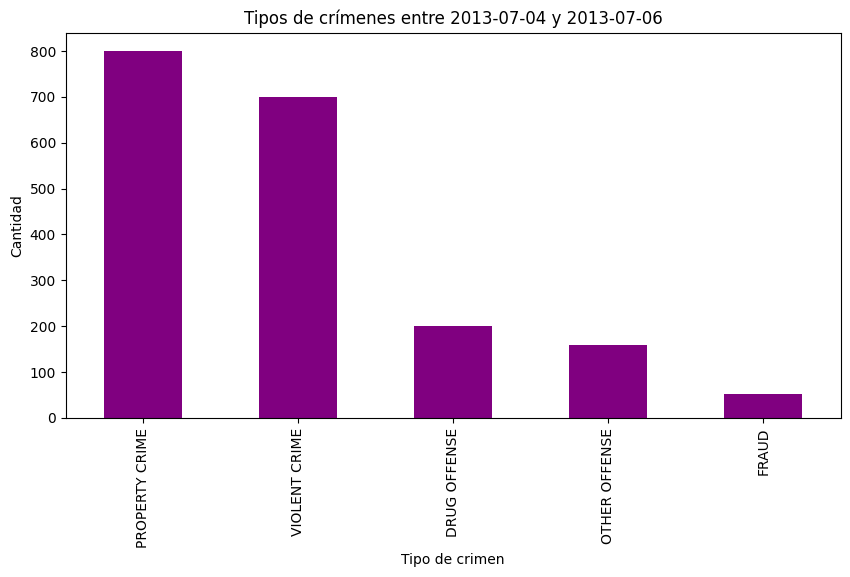

In [ ]:
#Independence day

start_date1 = '2015-07-04'
end_date1 = '2015-07-06'

start_date2 = '2014-07-04'
end_date2 = '2014-07-06'

start_date3 = '2013-07-04'
end_date3 = '2013-07-06'

event_crimes1 = dataL[(dataL['Date'] >= start_date1) & (dataL['Date'] < end_date1)]
event_crimes2 = dataL[(dataL['Date'] >= start_date2) & (dataL['Date'] < end_date2)]
event_crimes3 = dataL[(dataL['Date'] >= start_date3) & (dataL['Date'] < end_date3)]


event_crime_count1 = event_crimes1.shape[0]
event_crime_count2 = event_crimes2.shape[0]
event_crime_count3 = event_crimes3.shape[0]


event_crime_types1 = event_crimes1['Primary Type'].value_counts().head(5)
event_crime_types2 = event_crimes2['Primary Type'].value_counts().head(5)
event_crime_types3 = event_crimes3['Primary Type'].value_counts().head(5)


print(f"\nCrímenes entre {start_date1} y {end_date1}: {event_crime_count1}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types1)


plt.figure(figsize=(10, 5))
event_crime_types1.plot(kind='bar', title=f'Tipos de crímenes entre {start_date1} y {end_date1}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

print(f"\nCrímenes entre {start_date2} y {end_date2}: {event_crime_count2}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types2)

plt.figure(figsize=(10, 5))
event_crime_types2.plot(kind='bar', title=f'Tipos de crímenes entre {start_date2} y {end_date2}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

print(f"\nCrímenes entre {start_date3} y {end_date3}: {event_crime_count3}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types3)

plt.figure(figsize=(10, 5))
event_crime_types3.plot(kind='bar', title=f'Tipos de crímenes entre {start_date3} y {end_date3}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()


Crímenes entre 2015-12-31 y 2016-01-02: 1522

Tipos de crímenes más comunes durante el evento:
Primary Type
VIOLENT CRIME     613
PROPERTY CRIME    564
FRAUD             173
OTHER OFFENSE     117
DRUG OFFENSE       41
Name: count, dtype: int64


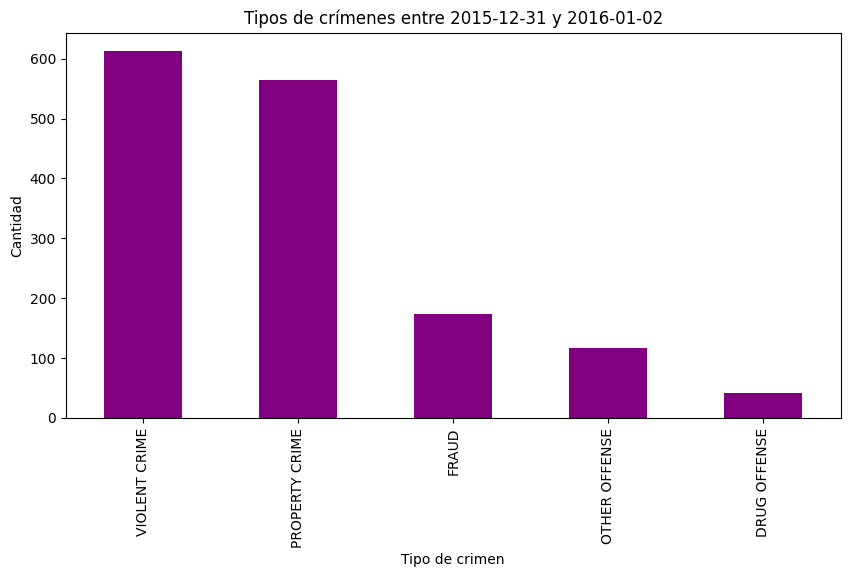


Crímenes entre 2014-12-31 y 2015-01-02: 1609

Tipos de crímenes más comunes durante el evento:
Primary Type
PROPERTY CRIME    598
VIOLENT CRIME     592
FRAUD             187
OTHER OFFENSE     133
DRUG OFFENSE       67
Name: count, dtype: int64


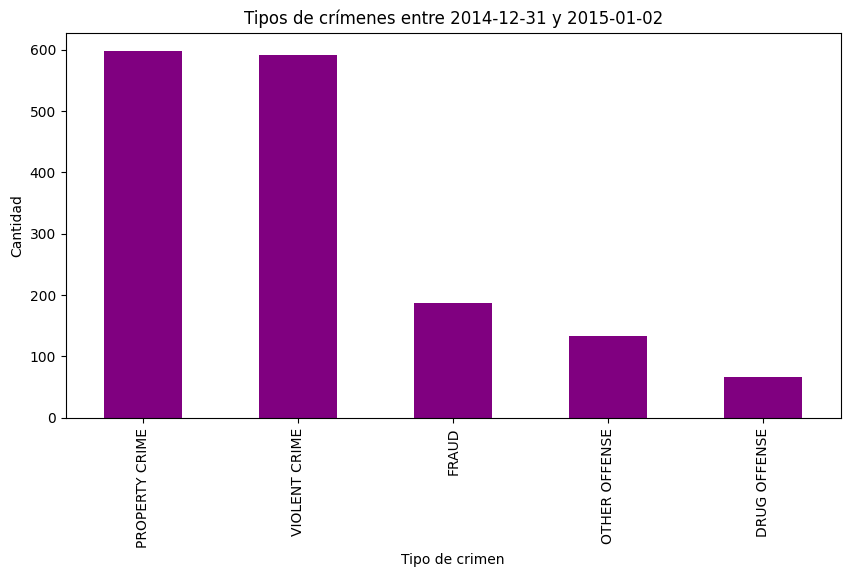


Crímenes entre 2013-12-31 y 2014-01-02: 1629

Tipos de crímenes más comunes durante el evento:
Primary Type
VIOLENT CRIME     601
PROPERTY CRIME    580
FRAUD             205
OTHER OFFENSE     120
DRUG OFFENSE       80
Name: count, dtype: int64


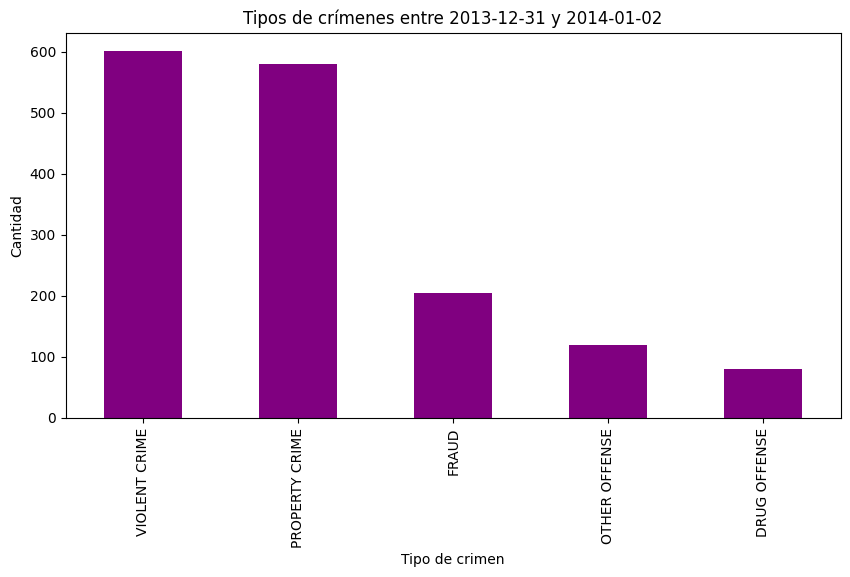

In [ ]:
#New years eve

start_date1 = '2015-12-31'
end_date1 = '2016-01-02'

start_date2 = '2014-12-31'
end_date2 = '2015-01-02'

start_date3 = '2013-12-31'
end_date3 = '2014-01-02'

event_crimes1 = dataL[(dataL['Date'] >= start_date1) & (dataL['Date'] < end_date1)]
event_crimes2 = dataL[(dataL['Date'] >= start_date2) & (dataL['Date'] < end_date2)]
event_crimes3 = dataL[(dataL['Date'] >= start_date3) & (dataL['Date'] < end_date3)]


event_crime_count1 = event_crimes1.shape[0]
event_crime_count2 = event_crimes2.shape[0]
event_crime_count3 = event_crimes3.shape[0]


event_crime_types1 = event_crimes1['Primary Type'].value_counts().head(5)
event_crime_types2 = event_crimes2['Primary Type'].value_counts().head(5)
event_crime_types3 = event_crimes3['Primary Type'].value_counts().head(5)


print(f"\nCrímenes entre {start_date1} y {end_date1}: {event_crime_count1}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types1)


plt.figure(figsize=(10, 5))
event_crime_types1.plot(kind='bar', title=f'Tipos de crímenes entre {start_date1} y {end_date1}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

print(f"\nCrímenes entre {start_date2} y {end_date2}: {event_crime_count2}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types2)

plt.figure(figsize=(10, 5))
event_crime_types2.plot(kind='bar', title=f'Tipos de crímenes entre {start_date2} y {end_date2}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

print(f"\nCrímenes entre {start_date3} y {end_date3}: {event_crime_count3}")
print("\nTipos de crímenes más comunes durante el evento:")
print(event_crime_types3)

plt.figure(figsize=(10, 5))
event_crime_types3.plot(kind='bar', title=f'Tipos de crímenes entre {start_date3} y {end_date3}', color='purple')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

### Tipos de crímenes más comunes dependiendo el tiempo: Filtra los crímenes ocurridos en horarios y analiza los tipos más comunes.



Tipos de crímenes más comunes durante la noche:
Primary Type
PROPERTY CRIME     202921
VIOLENT CRIME      139377
DRUG OFFENSE        59103
OTHER OFFENSE       39323
FRAUD               12257
WEAPONS OFFENSE      8011
NON-CRIMINAL           25
Name: count, dtype: int64


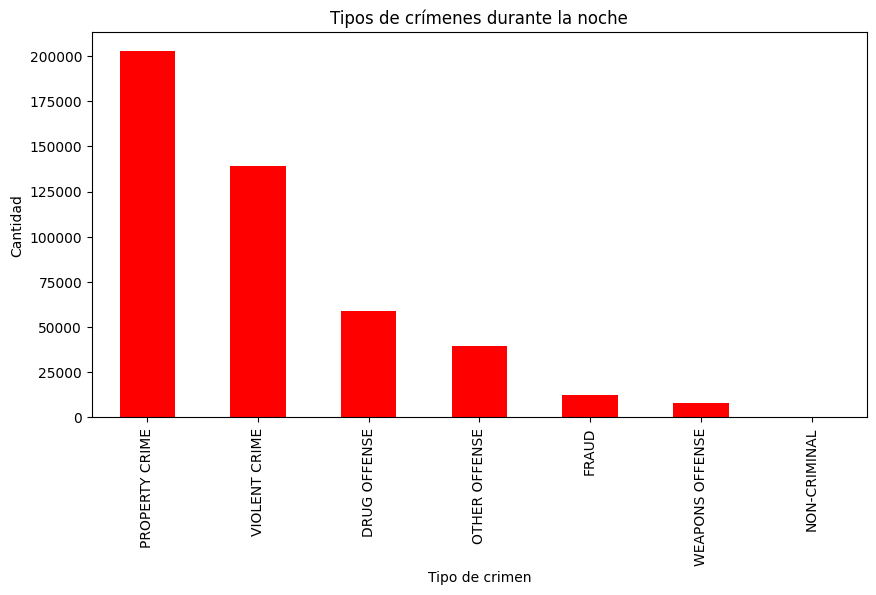

In [ ]:
night_crimes = dataL[dataL['Hour'] >= 18]
common_night_crimes = night_crimes['Primary Type'].value_counts().head(10)
print("\nTipos de crímenes más comunes durante la noche:")
print(common_night_crimes)

plt.figure(figsize=(10, 5))
common_night_crimes.plot(kind='bar', title='Tipos de crímenes durante la noche', color='red')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()


Tipos de crímenes más comunes durante el dia:
Primary Type
PROPERTY CRIME     504963
VIOLENT CRIME      325013
OTHER OFFENSE       86530
DRUG OFFENSE        84811
FRAUD               66325
WEAPONS OFFENSE     10353
NON-CRIMINAL           76
Name: count, dtype: int64


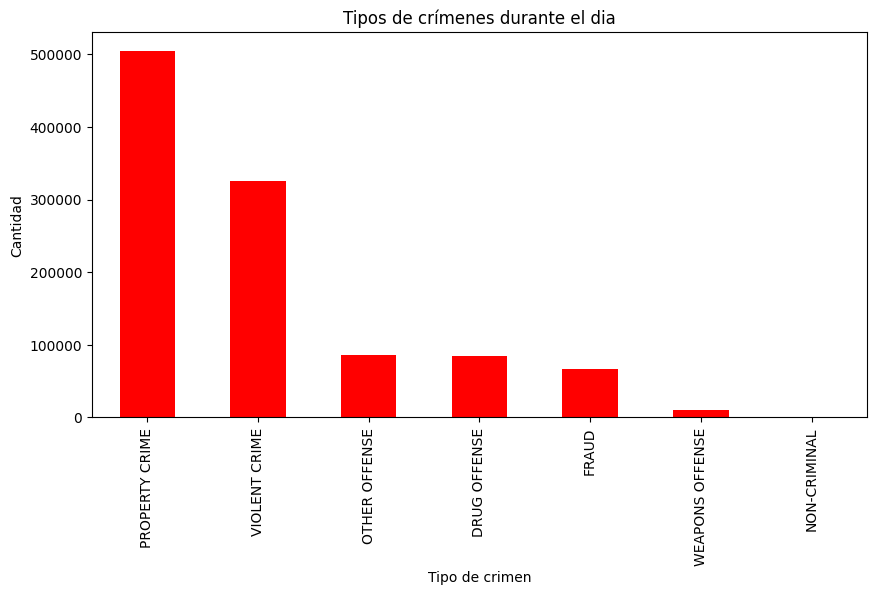

In [ ]:
day_crimes = dataL[dataL['Hour'] <= 18]
common_day_crimes = day_crimes['Primary Type'].value_counts().head(10)
print("\nTipos de crímenes más comunes durante el dia:")
print(common_day_crimes)

plt.figure(figsize=(10, 5))
common_day_crimes.plot(kind='bar', title='Tipos de crímenes durante el dia', color='red')
plt.xlabel('Tipo de crimen')
plt.ylabel('Cantidad')
plt.show()

### Matrices: Visualización de matrices para variables.


#### Matriz correlacion

Número de valores únicos en 'Primary Type': 7


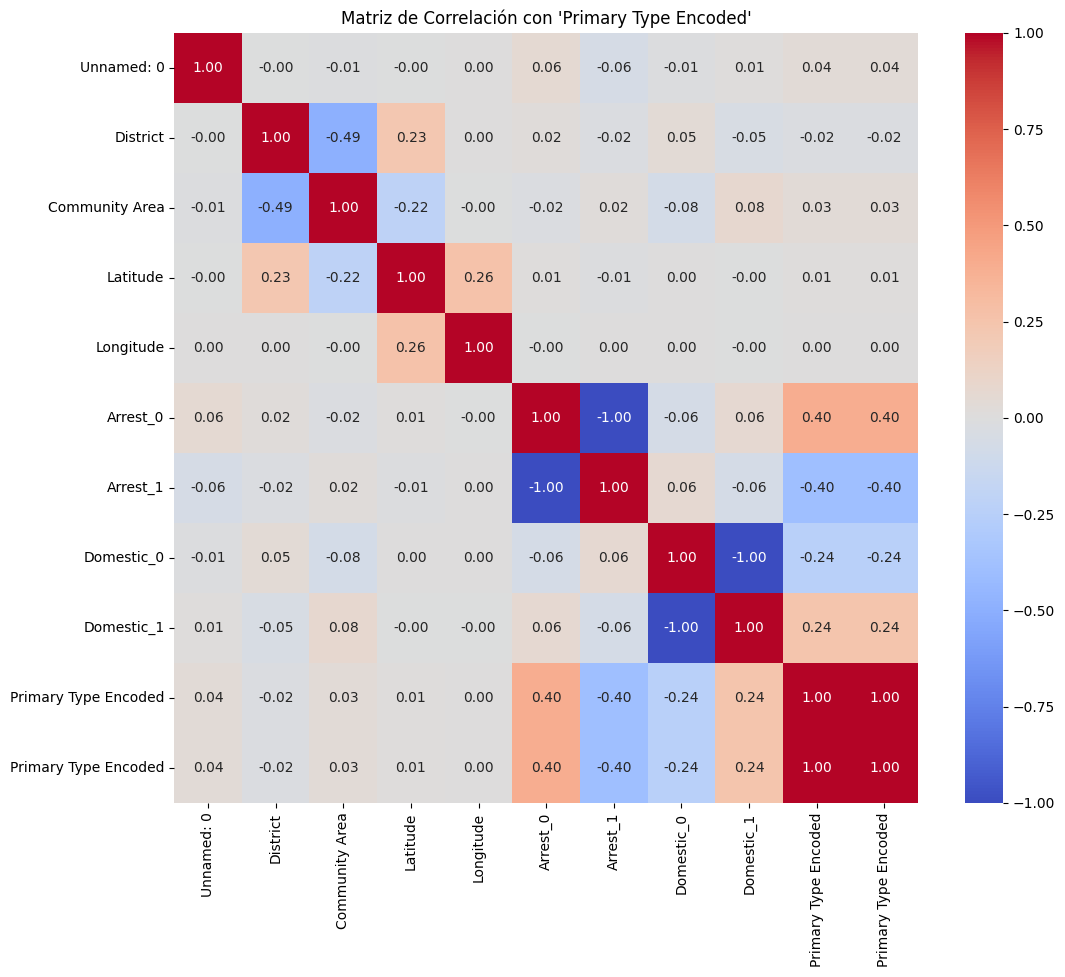

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_corr = dataL.copy()

label_encoder = LabelEncoder()
df_corr['Primary Type Encoded'] = label_encoder.fit_transform(df_corr['Primary Type'])

unique_crimes = df_corr['Primary Type'].nunique()
print(f"Número de valores únicos en 'Primary Type': {unique_crimes}")

numeric_columns = df_corr.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.append(pd.Index(['Primary Type Encoded']))

correlation_matrix = df_corr[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación con 'Primary Type Encoded'")
plt.show()

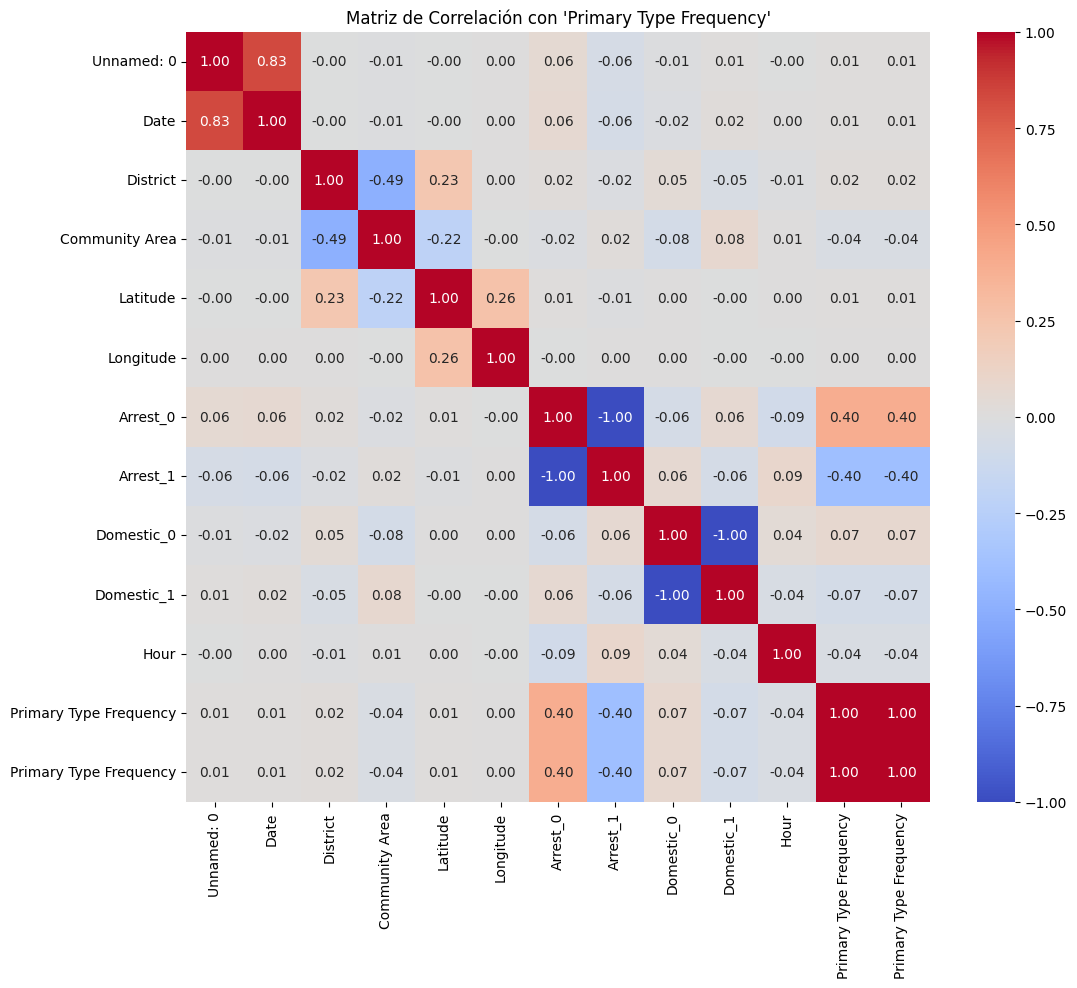

In [ ]:
df_corr = dataL.copy()

crime_frequency = df_corr['Primary Type'].value_counts()
df_corr['Primary Type Frequency'] = df_corr['Primary Type'].map(crime_frequency)

numeric_columns = df_corr.select_dtypes(include=['int64', 'float64', 'datetime64[ns]', 'int32']).columns
numeric_columns = numeric_columns.append(pd.Index(['Primary Type Frequency']))

correlation_matrix = df_corr[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación con 'Primary Type Frequency'")
plt.show()



#### Matriz densidad delitos/hora

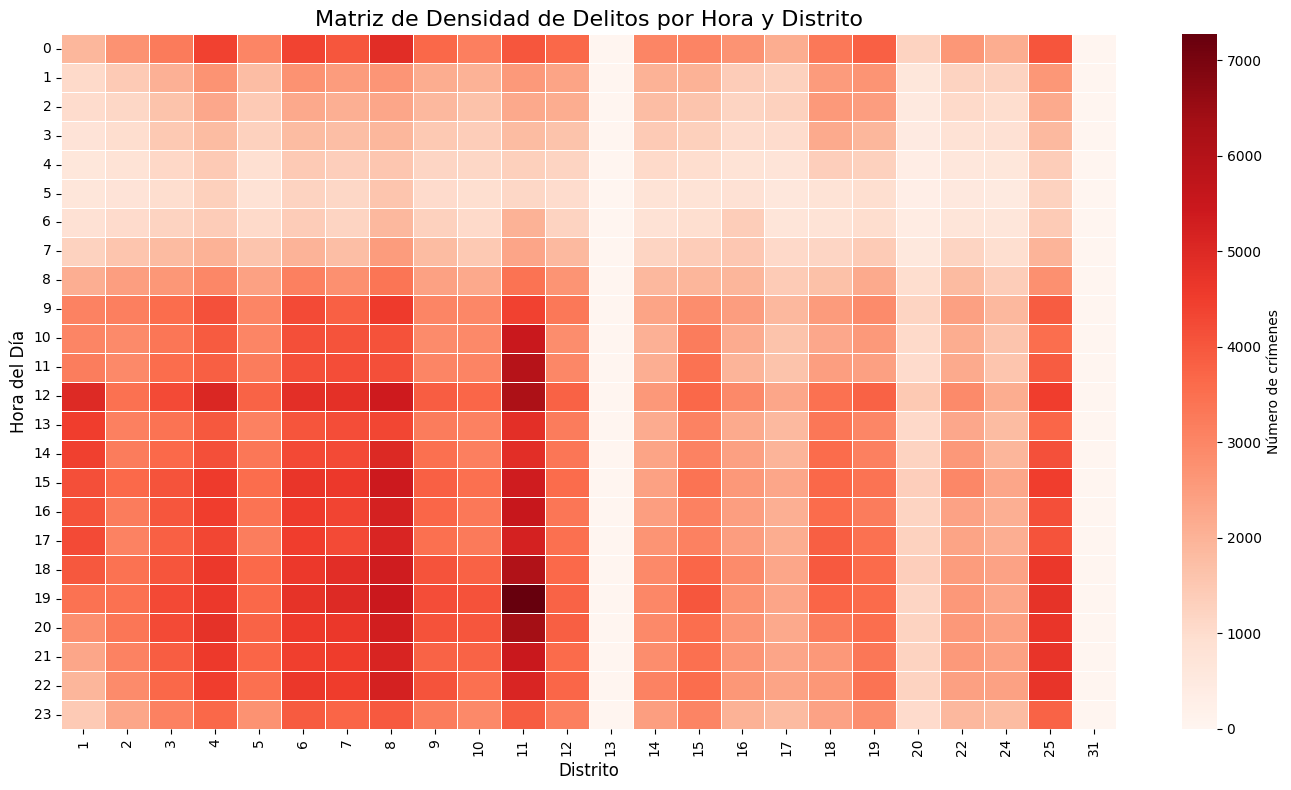

In [ ]:
#Matriz densidad delitos
dataL['Hour'] = dataL['Date'].dt.hour
dataL['Day'] = dataL['Date'].dt.dayofweek

crime_density = dataL.groupby(['Hour', 'District']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(crime_density, cmap='Reds', linewidths=0.5, cbar_kws={'label': 'Número de crímenes'})
plt.title("Matriz de Densidad de Delitos por Hora y Distrito", fontsize=16)
plt.xlabel("Distrito", fontsize=12)
plt.ylabel("Hora del Día", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

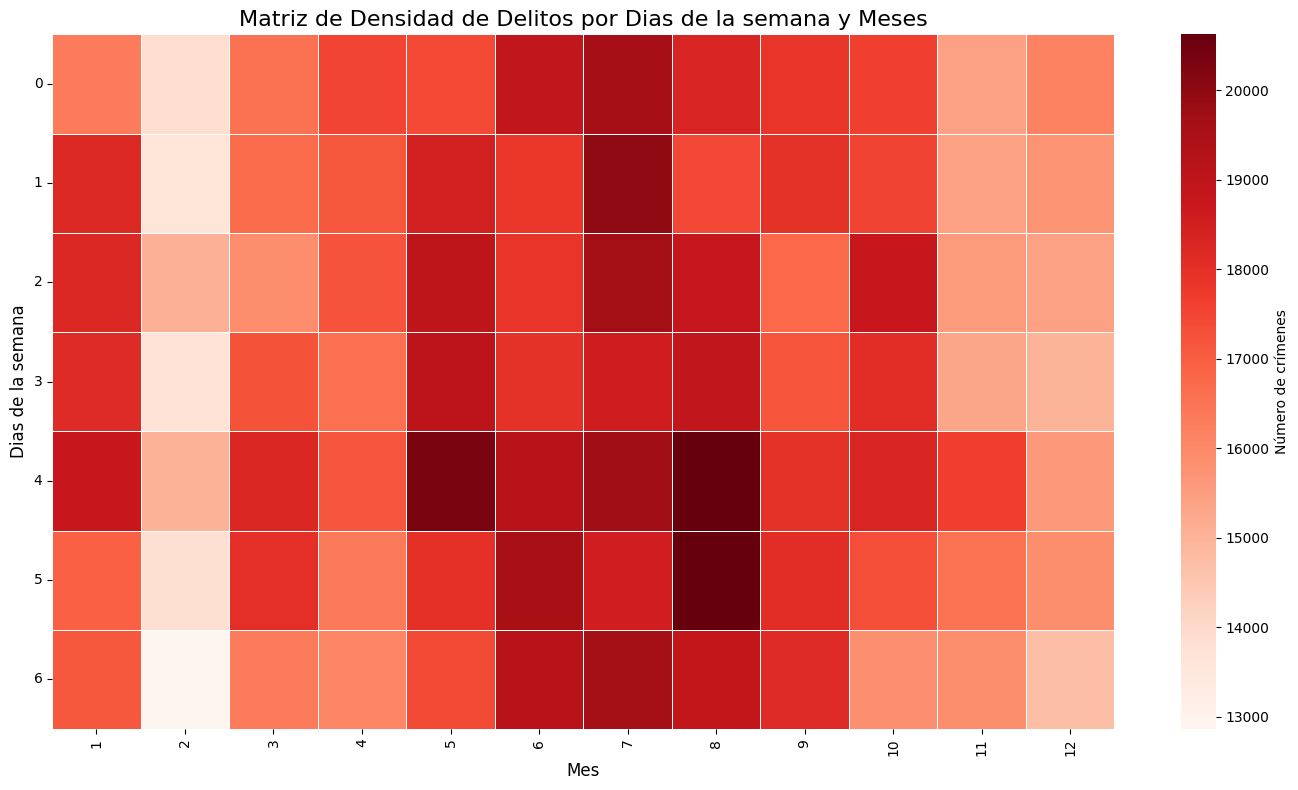

In [ ]:
#Matriz densidad delitos
dataL['Hour'] = dataL['Date'].dt.hour
dataL['Month'] = dataL['Date'].dt.month
dataL['Day'] = dataL['Date'].dt.dayofweek

crime_density = dataL.groupby(['Day', 'Month']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(crime_density, cmap='Reds', linewidths=0.5, cbar_kws={'label': 'Número de crímenes'})
plt.title("Matriz de Densidad de Delitos por Dias de la semana y Meses", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Dias de la semana", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###**Conclusiones**



1.   **En julio de 2012,** los crímenes más frecuentes fueron theft, battery y criminal damage, concentrándose principalmente en calles y aceras, mientras que los domestic crimes representaron una minoría frente a los non-domestic crimes.Además, se puede visualizar un mapa identificando las zonas más calientes donde ocurrieron estos incidentes.
2.   **Horarios con mayor incidencia de crímenes:** Las horas con mayor incidencia de crímenes se concentran entre las 15:00 y las 21:00, mostrando un pico significativo durante las tardes y primeras horas de la noche.
3.   **Tipos de crímenes más comunes en áreas residenciales:** En ubicaciones residenciales, los crímenes más frecuentes son **theft**, **battery**, y **assault**, destacando la importancia de estas áreas como foco de delitos específicos.
4.  **Relación entre arrestos y tipos de crímenes:** Los delitos como **narcotics** y assault presentan las tasas de arresto más altas, mientras que crímenes como theft y criminal damage tienen tasas significativamente más bajas.
5.   **Incidencia de crímenes domésticos:** Los domestic crimes representan una proporción menor en comparación con los non-domestic crimes; además, solo el 19.40% de los crímenes domésticos terminaron en arresto.
6.   **Thanksgiving:** Durante Thanksgiving, los crímenes más frecuentes son theft, battery y criminal damage, mostrando un ligero incremento en incidentes, especialmente en espacios públicos.  
  **Independence Day:** En el Día de la Independencia, predominan battery, theft y criminal damage, con un notable incremento en delitos relacionados con narcotics durante las celebraciones.  
  **New Year's Eve:** Durante la víspera de Año Nuevo, los delitos más comunes son battery, theft y deceptive practice, destacando un aumento en crímenes relacionados con fraudes y engaños.
7.   **Tipos de crímenes más comunes dependiendo el tiempo:** Durante la noche, los delitos más frecuentes son theft, narcotics y assault, mientras que durante el día predominan theft, criminal damage y battery, mostrando diferencias significativas según el horario.
8.   **Matrices de correlación:** Las matrices de correlación muestran relaciones débiles pero significativas entre variables como **community area**, **primary type**, y **hour**, ofreciendo insights sobre cómo estas variables interactúan.  
  **Matrices de densidad:** Las matrices de densidad destacan patrones temporales y espaciales, identificando horas específicas del día y áreas comunitarias con mayor concentración de crímenes.  
    *   **Matriz de densidad delitos/hora:** Los crímenes presentan una alta concentración entre las **17:00 y las 22:00**, especialmente en distritos específicos, indicando patrones temporales clave para la distribución de recursos policiales.  
    *  **Matriz de densidad por días de la semana y meses:** Los viernes y sábados muestran una mayor incidencia de crímenes, con picos durante los meses de verano, como julio, lo que refleja estacionalidad en la actividad criminal.  













# **5. Relación entre la variable objetivo**

Examinar la correlación entre las variables del dataset y la variable objetivo, destacando patrones y relaciones significativas.

Nuestra variable objetivo sera el Primary Type, que son los tipos de crimenes.

### Relacion entre Primary type y Date

<Figure size 1400x800 with 0 Axes>

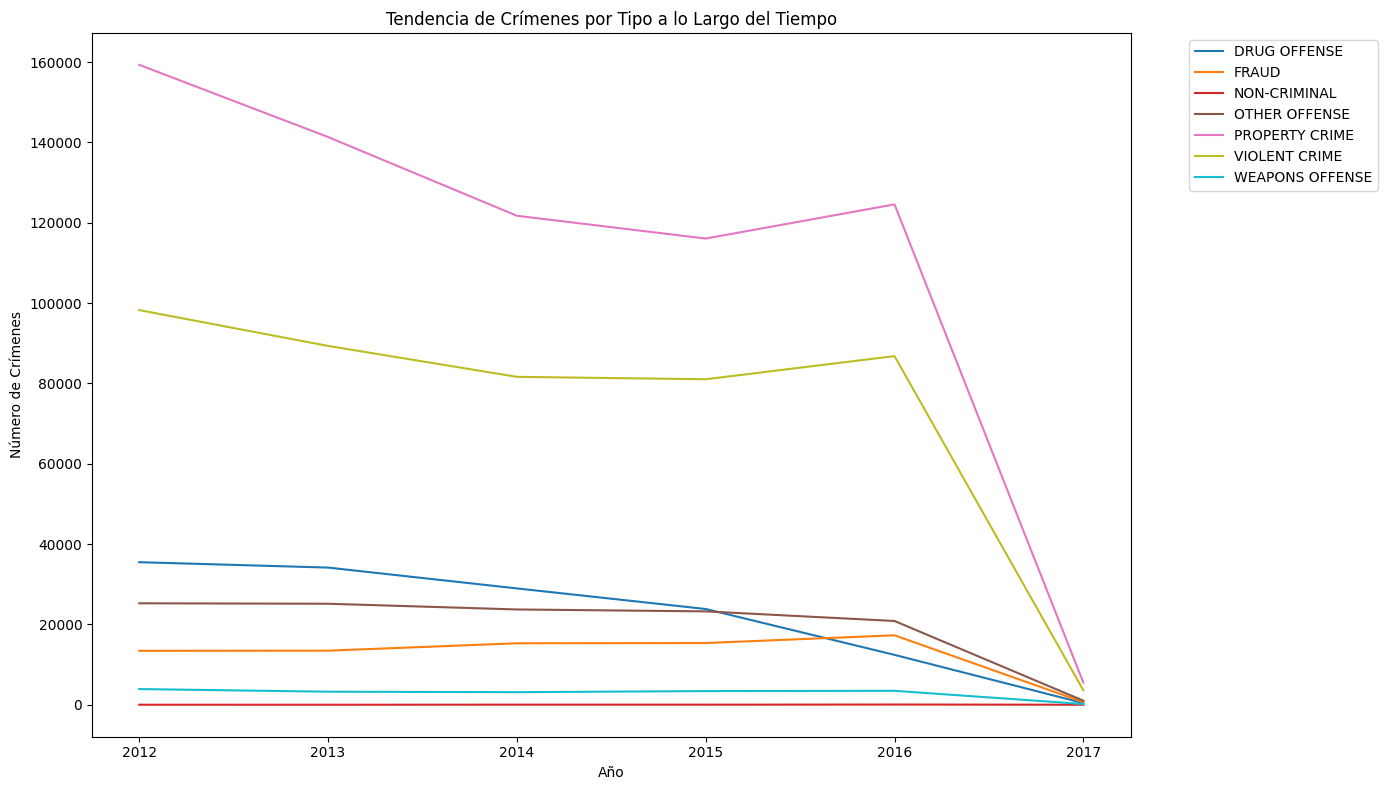

In [ ]:
dataL['Year'] = dataL['Date'].dt.year
dataL['Month'] = dataL['Date'].dt.month

crime_by_year = dataL.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
crime_by_year.plot(kind='line', figsize=(14, 8), colormap='tab10')
plt.title("Tendencia de Crímenes por Tipo a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Número de Crímenes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Relacion entre Primary type y Block



Top 10 Bloques con Mayor Cantidad de Crímenes:
Block
001XX N STATE ST                       3634
0000X W TERMINAL ST                    2746
008XX N MICHIGAN AVE                   2465
076XX S CICERO AVE                     2116
0000X N STATE ST                       1844
064XX S DR MARTIN LUTHER KING JR DR    1349
083XX S STEWART AVE                    1216
063XX S DR MARTIN LUTHER KING JR DR    1138
051XX W MADISON ST                     1115
046XX W NORTH AVE                      1113
Name: count, dtype: int64


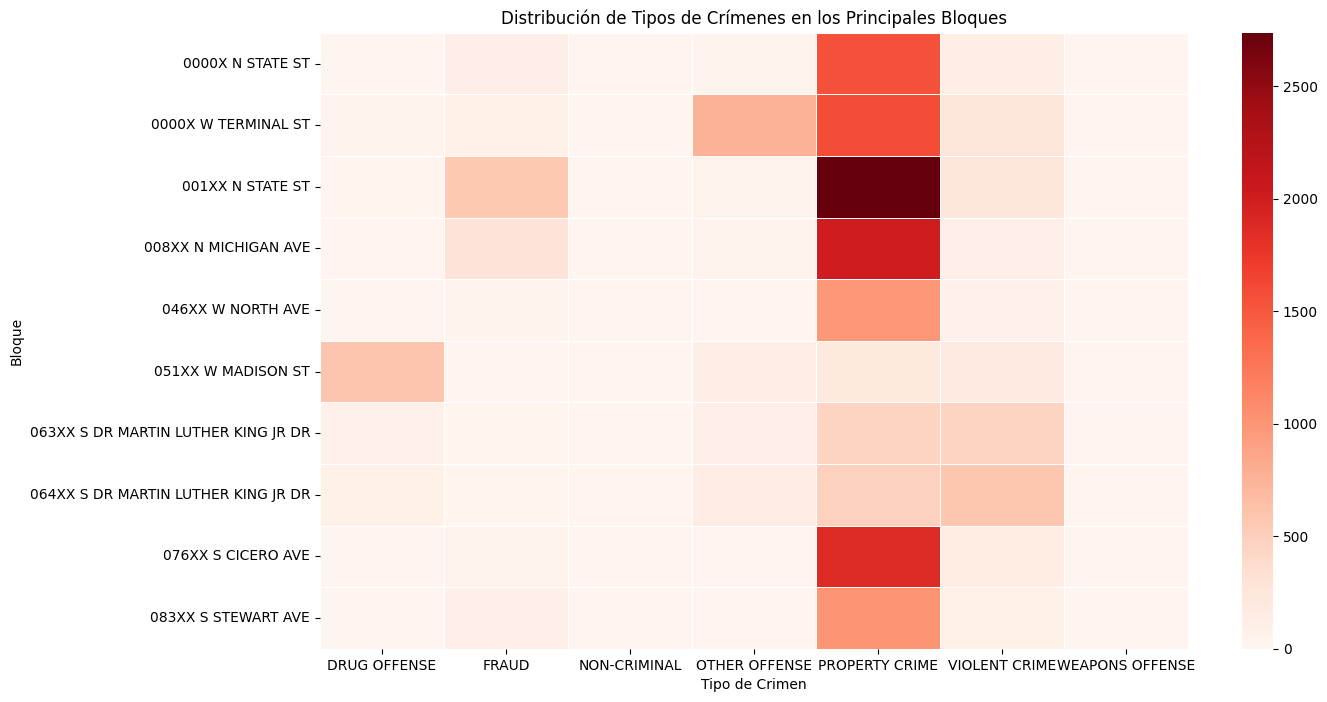

In [ ]:
top_blocks = dataL['Block'].value_counts().head(10)
print("\nTop 10 Bloques con Mayor Cantidad de Crímenes:")
print(top_blocks)

crime_by_block = dataL[dataL['Block'].isin(top_blocks.index)]
common_crime_by_block = crime_by_block.groupby(['Block', 'Primary Type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(common_crime_by_block, cmap='Reds', annot=False, linewidths=0.5)
plt.title("Distribución de Tipos de Crímenes en los Principales Bloques")
plt.xlabel("Tipo de Crimen")
plt.ylabel("Bloque")
plt.show()

### Relacion entre Primary type y Location Description



Ubicaciones más comunes de crímenes:
Location Description
STREET                            332125
RESIDENCE                         233516
APARTMENT                         185020
SIDEWALK                          160891
OTHER                              55774
PARKING LOT/GARAGE(NON.RESID.)     41767
ALLEY                              31771
RESIDENTIAL YARD (FRONT/BACK)      30645
SMALL RETAIL STORE                 28803
SCHOOL, PUBLIC, BUILDING           25959
dtype: int64


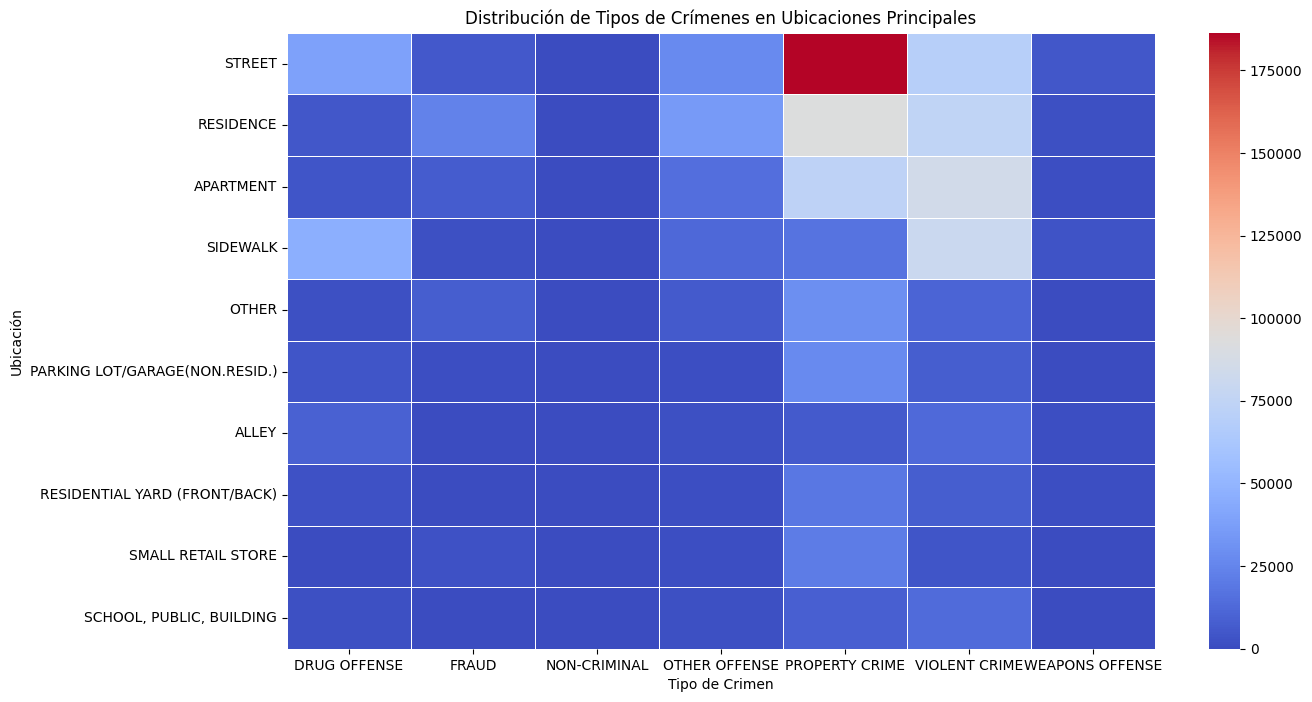

In [ ]:
location_by_crime = dataL.groupby(['Location Description', 'Primary Type']).size().unstack(fill_value=0)

top_locations = location_by_crime.sum(axis=1).sort_values(ascending=False).head(10)
print("\nUbicaciones más comunes de crímenes:")
print(top_locations)

plt.figure(figsize=(14, 8))
sns.heatmap(location_by_crime.loc[top_locations.index], cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Distribución de Tipos de Crímenes en Ubicaciones Principales")
plt.xlabel("Tipo de Crimen")
plt.ylabel("Ubicación")
plt.show()

### Relacion entre Primary type y District



Distritos con Mayor Cantidad de Crímenes:
District
11    102876
8      96315
6      86915
4      85680
7      84373
25     83204
3      73194
9      70865
12     69480
10     66273
dtype: int64


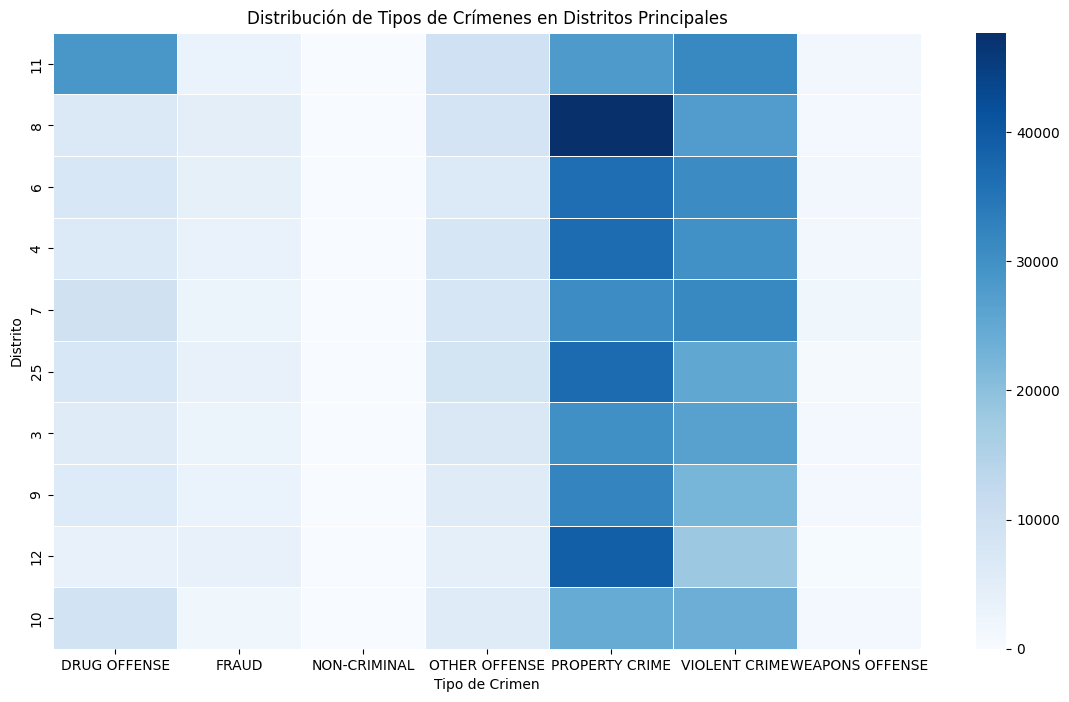

In [ ]:
district_by_crime = dataL.groupby(['District', 'Primary Type']).size().unstack(fill_value=0)

top_districts = district_by_crime.sum(axis=1).sort_values(ascending=False).head(10)
print("\nDistritos con Mayor Cantidad de Crímenes:")
print(top_districts)

plt.figure(figsize=(14, 8))
sns.heatmap(district_by_crime.loc[top_districts.index], cmap='Blues', annot=False, linewidths=0.5)
plt.title("Distribución de Tipos de Crímenes en Distritos Principales")
plt.xlabel("Tipo de Crimen")
plt.ylabel("Distrito")
plt.show()

### Relacion entre Primary type y Comunity Area


<Figure size 1400x800 with 0 Axes>

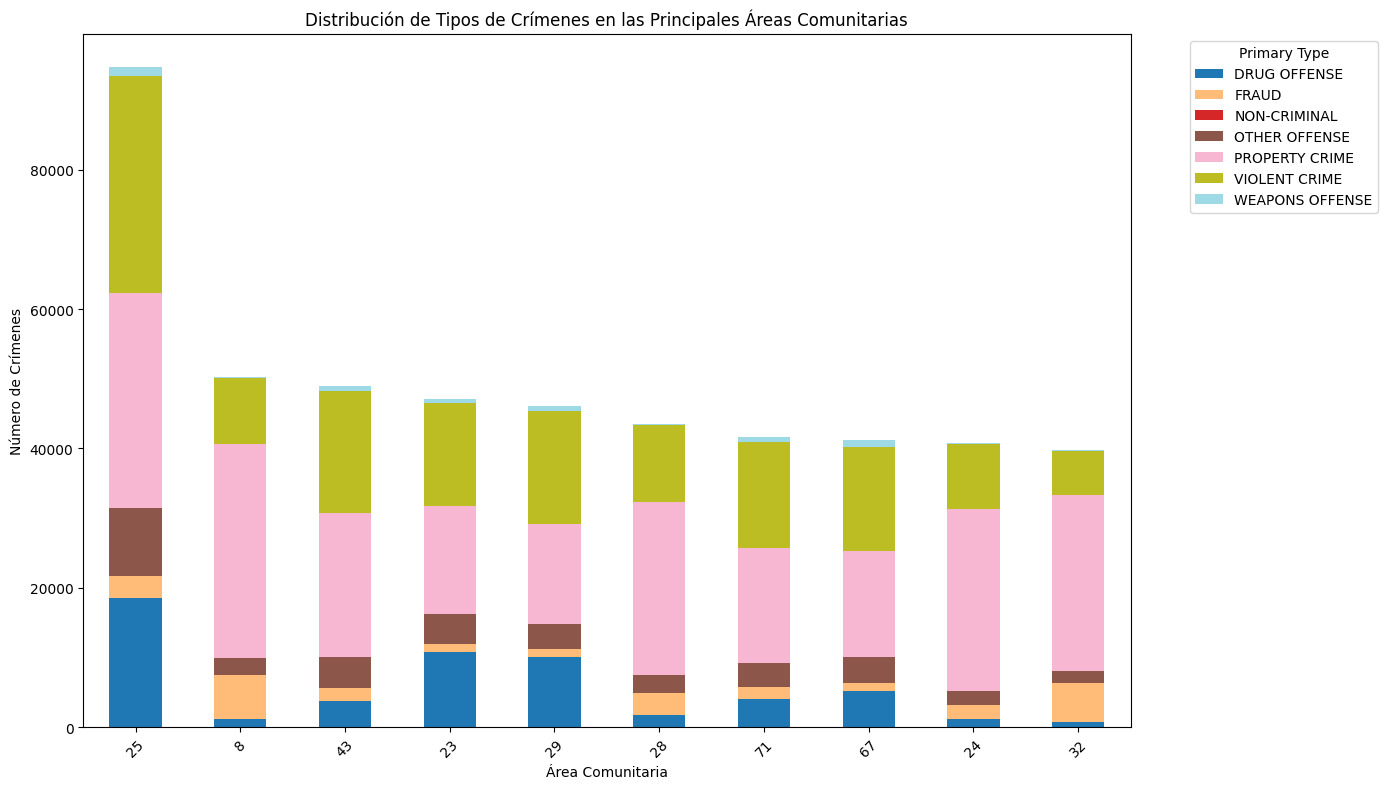

In [ ]:
community_area_crime = dataL.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0)

top_community_areas = community_area_crime.sum(axis=1).sort_values(ascending=False).head(10)

filtered_community_area_crime = community_area_crime.loc[top_community_areas.index]

plt.figure(figsize=(14, 8))
filtered_community_area_crime.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title("Distribución de Tipos de Crímenes en las Principales Áreas Comunitarias")
plt.xlabel("Área Comunitaria")
plt.ylabel("Número de Crímenes")
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###**Conclusiones**


1.   **Relación entre Primary Type y Date:** Los datos muestran una tendencia general a la baja en la cantidad de crímenes reportados entre 2012 y 2017 para casi todos los tipos de delitos. Sin embargo, delitos como theft, battery, y criminal damage siguen siendo los más frecuentes a lo largo del tiempo, lo que refleja su persistencia como las principales categorías de actividad criminal.
2.   **Relación entre Primary Type y Block:** Los bloques con mayor cantidad de crímenes incluyen 000XX N STATE ST y 008XX N MICHIGAN AVE, concentrando principalmente delitos como theft, battery, y criminal damage, lo que refleja una alta actividad criminal en áreas específicas del centro urbano.
3.   **Relación entre Primary Type y Location Description:** Las ubicaciones más comunes para la ocurrencia de crímenes incluyen street, residence, y apartment, donde los delitos predominantes son theft, battery, y criminal damage, destacando la importancia de estos espacios en los patrones delictivos.
4.   **Relación entre Primary Type y District:** Los distritos con mayor cantidad de crímenes son 11, 8, y 6, predominando delitos como theft, battery, y narcotics, lo que indica focos específicos de actividad delictiva que requieren mayor atención.
5.   **Relación entre Primary Type y Community Area:** Las áreas comunitarias con mayor número de crímenes son 25, 8, y 53, destacándose delitos como theft, battery, y criminal damage, reflejando patrones persistentes de actividad criminal en estas zonas.





# **Modelado**


## Importar las librerias necesarias

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



## Separar variables independientes (X) y dependiente (y)

In [ ]:
X = dataL.drop(columns=['Primary Type', 'Date', 'Block', 'Description', 'Location Description', 'Location', 'Unnamed: 0'])
y = dataL['Primary Type']


In [ ]:
X.head()

District  Community Area  Latitude  Longitude  Arrest_0  Arrest_1  \
0        10              29        41        -87         0         1   
1         3              42        41        -87         1         0   
2        15              25        41        -87         1         0   
3        15              25        41        -87         1         0   
4        15              25        41        -87         1         0   

   Domestic_0  Domestic_1  Hour  Day  Month  Year  
0           0           1    23    1      5  2016  
1           0           1    21    1      5  2016  
2           1           0    23    1      5  2016  
3           1           0    22    1      5  2016  
4           0           1    22    1      5  2016

In [ ]:
y.head()

0     VIOLENT CRIME
1     VIOLENT CRIME
2     OTHER OFFENSE
3     VIOLENT CRIME
4    PROPERTY CRIME
Name: Primary Type, dtype: object

In [ ]:
# Reemplazar valores nulos en y con "UNKNOWN"
y.fillna("UNKNOWN", inplace=True)


In [ ]:
y.unique()

array(['VIOLENT CRIME', 'OTHER OFFENSE', 'PROPERTY CRIME',
       'WEAPONS OFFENSE', 'FRAUD', 'DRUG OFFENSE', 'NON-CRIMINAL',
       'UNKNOWN'], dtype=object)

## Dividir en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

## **Árboles de decision**

### Entrenamiento del modelo Decision Tree (Criterio GINI)


Ajustes de hiper parametros para que el Árbol de decision se pueda visualizar correctamente y se entienda. Valores ajustados:

- min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.
- min_samples_leaf: Número mínimo de muestras que debe tener un nodo hoja.

In [ ]:
dt_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

### Evaluar el modelo Decisión Tree (Gini)


In [ ]:
y_pred_gini = dt_gini.predict(X_test)
print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini))


Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.41      0.98      0.58     27041
           1       0.00      0.00      0.00     15115
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00     24001
           4       0.62      0.85      0.72    133476
           5       0.00      0.00      0.00        11
           6       0.74      0.37      0.49     88170
           7       0.00      0.00      0.00      3509

    accuracy                           0.59    291343
   macro avg       0.22      0.28      0.22    291343
weighted avg       0.55      0.59      0.53    291343



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Matriz de confusión

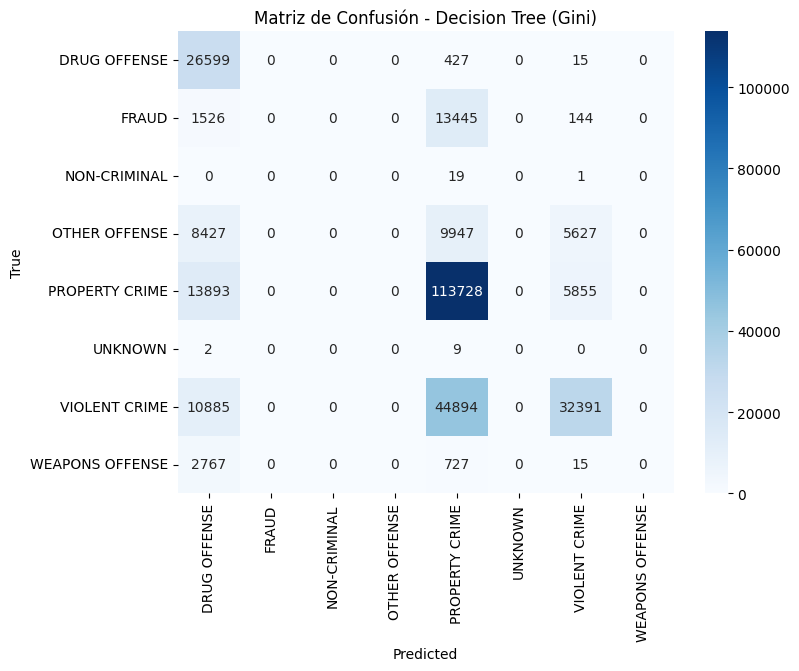

In [ ]:
cm_gini = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión - Decision Tree (Gini)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Visualización del Árbol de Decisión (criterio Gini)


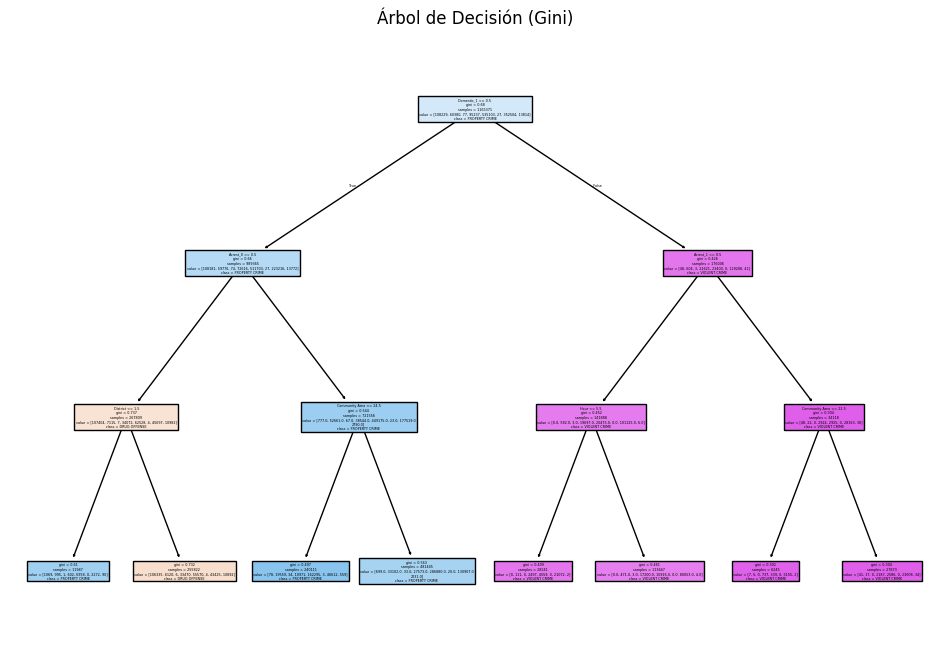

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_gini, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True)
plt.title("Árbol de Decisión (Gini)")
plt.show()

### Entrenamiento del modelo Decisión Tree (Criterio ENTROPY)



Ajustes de hiper parametros para que el Árbol de decision se pueda visualizar correctamente y se entienda. Valores ajustados:

- min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.
- min_samples_leaf: Número mínimo de muestras que debe tener un nodo hoja.

In [ ]:
dt_entropy = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

### Evaluar el modelo Decisión Tree (ENTROPY)

In [ ]:
y_pred_entropy = dt_entropy.predict(X_test)
print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))



Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.41      0.98      0.58     27041
           1       0.00      0.00      0.00     15115
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00     24001
           4       0.62      0.85      0.72    133476
           5       0.00      0.00      0.00        11
           6       0.74      0.37      0.49     88170
           7       0.00      0.00      0.00      3509

    accuracy                           0.59    291343
   macro avg       0.22      0.28      0.22    291343
weighted avg       0.55      0.59      0.53    291343



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Matriz de Confusión (Criterio ENTROPY)

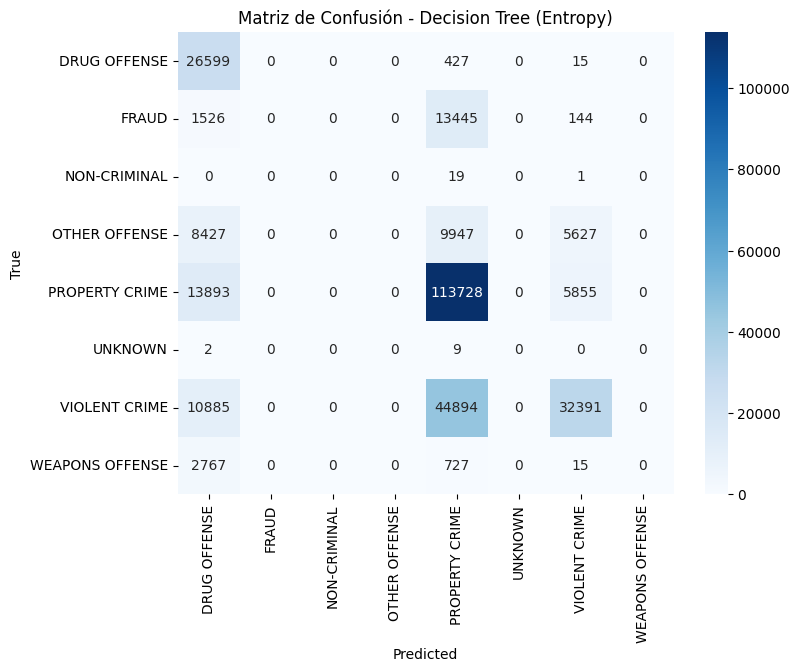

In [ ]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_entropy, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión - Decision Tree (Entropy)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Visualización del Árbol de decisión (Criterio ENTROPY)

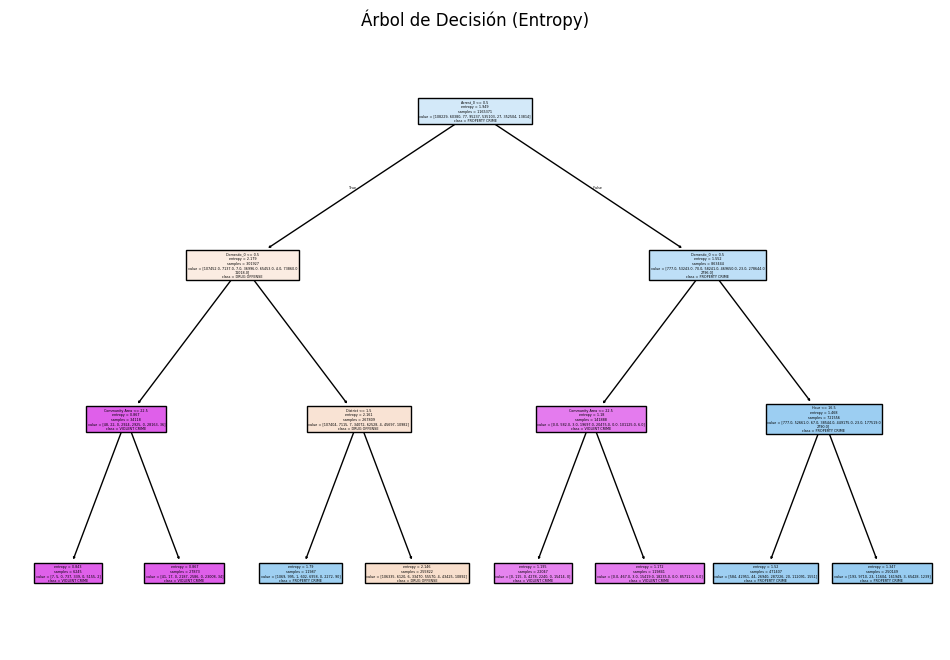

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree( dt_entropy, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True)
plt.title("Árbol de Decisión (Entropy)")
plt.show()


## **Random Forest**

### Entrenar el modelo Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=250, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

###  Evaluar el modelo

In [ ]:
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58     27041
           1       0.17      0.09      0.11     15115
           2       0.00      0.00      0.00        20
           3       0.20      0.11      0.14     24001
           4       0.61      0.70      0.65    133476
           5       0.00      0.00      0.00        11
           6       0.52      0.48      0.50     88170
           7       0.08      0.04      0.05      3509

    accuracy                           0.54    291343
   macro avg       0.26      0.26      0.25    291343
weighted avg       0.51      0.54      0.52    291343



### Matriz de confusión

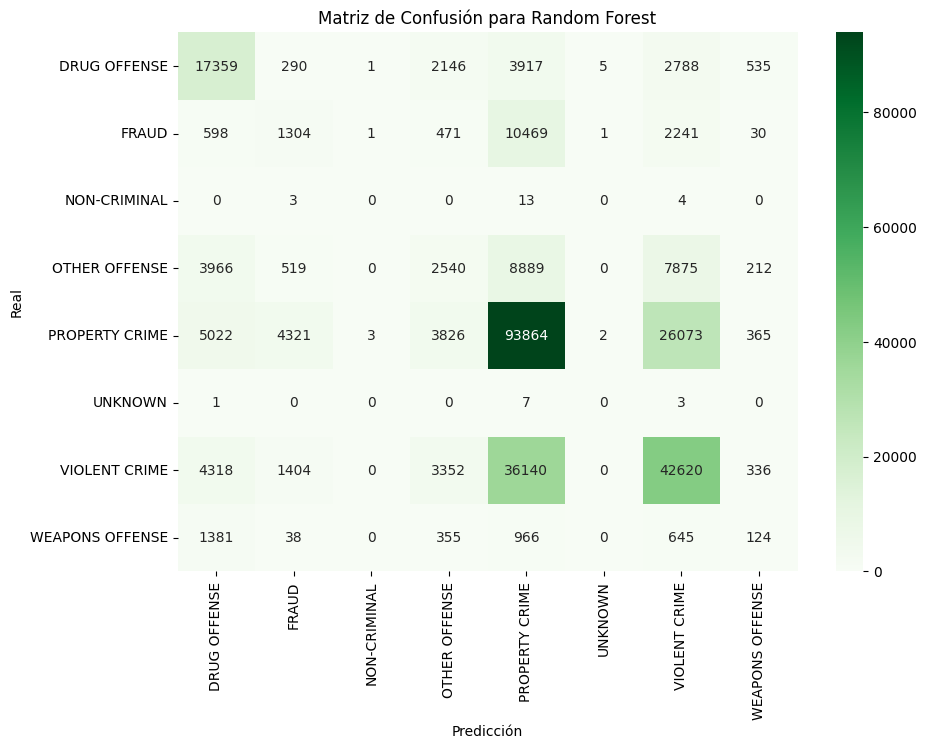

In [ ]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión para Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Visualizar el modelo

<ipython-input-82-8ce1fa48c165>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


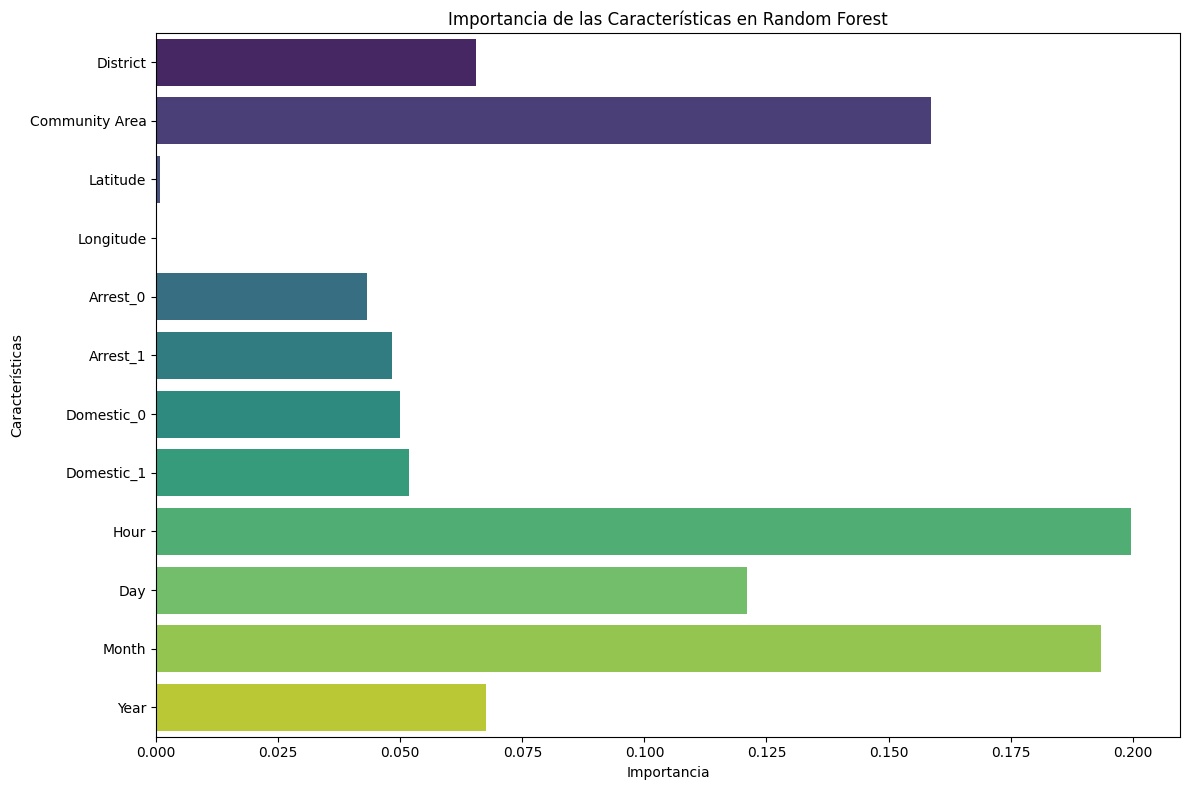

In [ ]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las Características en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


Hiperparámetros:
- n_estimators: Ajusta el número de árboles (ejemplo: 100, 200, 500).
- max_depth: Controla la profundidad máxima de los árboles para evitar overfitting.
- min_samples_split y min_samples_leaf: Controlan el tamaño mínimo de las hojas o divisiones.

Puedes usar herramientas como GridSearchCV o RandomizedSearchCV para optimizar estos parámetros.

## **Gradient Boosting**

### Entrenar el modelo de Gradient Boosting

1. Antes de mejorar

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

### Evaluar el modelo

In [ ]:
y_pred = gb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.89      0.62     27041
           1       0.00      0.00      0.00     15115
           2       0.00      0.00      0.00        20
           3       0.24      0.00      0.00     24001
           4       0.61      0.88      0.72    133476
           5       0.00      0.00      0.00        11
           6       0.70      0.38      0.50     88170
           7       0.00      0.00      0.00      3509

    accuracy                           0.60    291343
   macro avg       0.25      0.27      0.23    291343
weighted avg       0.56      0.60      0.54    291343



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Matriz de confusión

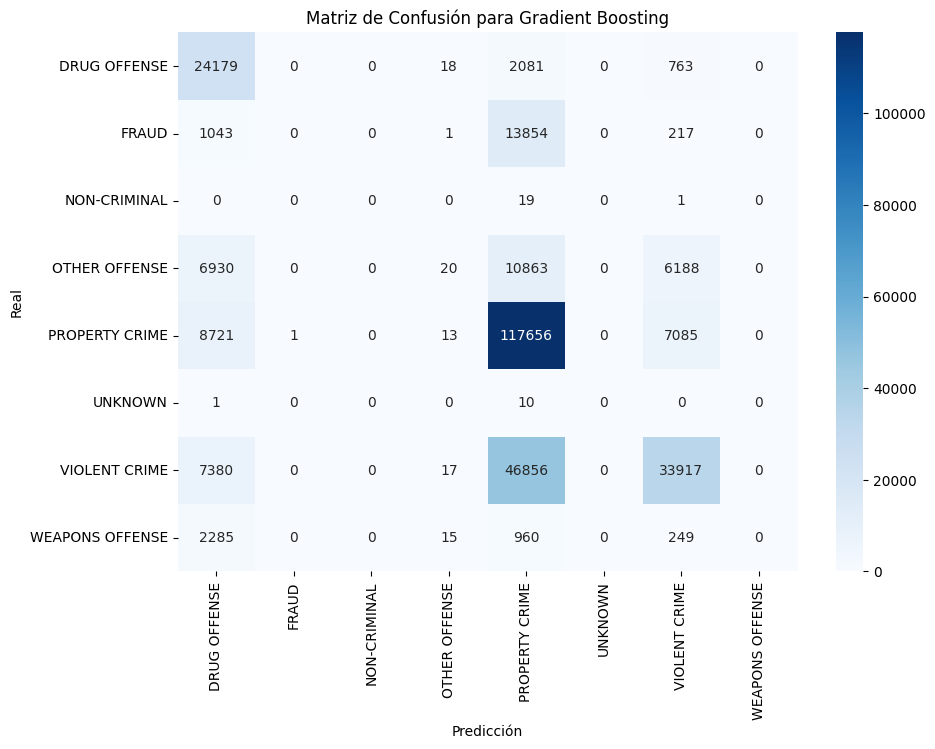

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión para Gradient Boosting")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Visualización del modelo

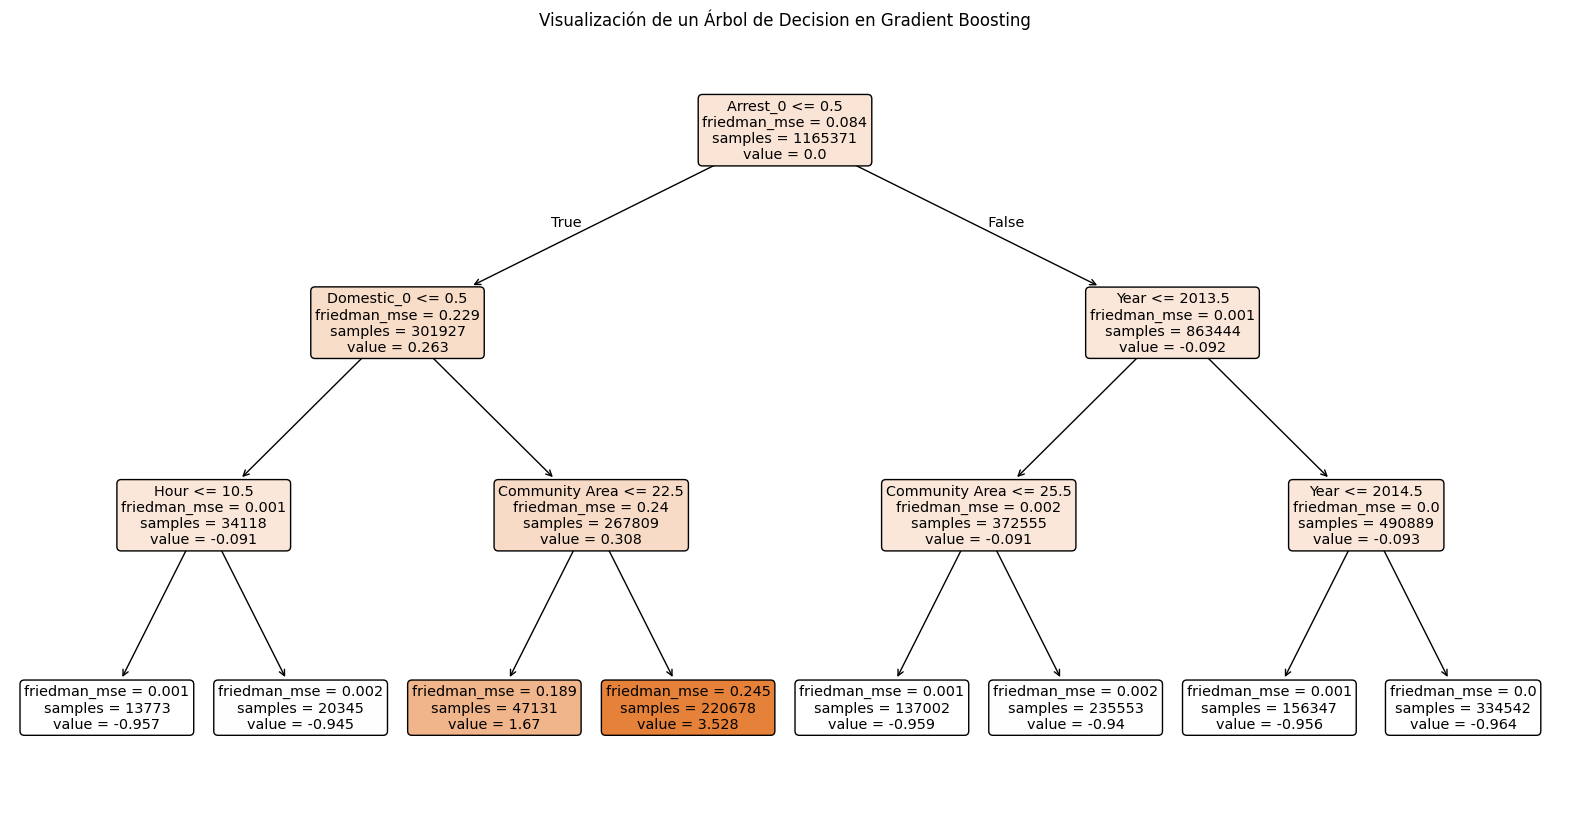

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(gb_model.estimators_[0, 0], filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True)
plt.title("Visualización de un Árbol de Decision en Gradient Boosting")
plt.show()


### **Mejora del modelo Gradient Boosting**

#### Definir el modelo base


In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

#### Definir los hiperparámetros a explorar

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5]
}

####Configurar el GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

#### Ejecutar la búsqueda de hiperparámetros

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

#### Mostrar los mejores hiperparámetros

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 200}


#### Reentrenar el modelo con los mejores parámetros

In [ ]:
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                           random_state=42)

#### Evaluar el modelo en el conjunto de prueba

In [ ]:
y_pred = best_gb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.87      0.61     27041
           1       0.50      0.00      0.00     15115
           2       0.00      0.00      0.00        20
           3       0.46      0.01      0.03     24001
           4       0.61      0.89      0.72    133476
           5       0.00      0.00      0.00        11
           6       0.73      0.37      0.49     88170
           7       0.00      0.00      0.00      3509

    accuracy                           0.60    291343
   macro avg       0.35      0.27      0.23    291343
weighted avg       0.61      0.60      0.54    291343



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Generar la matriz de confusión

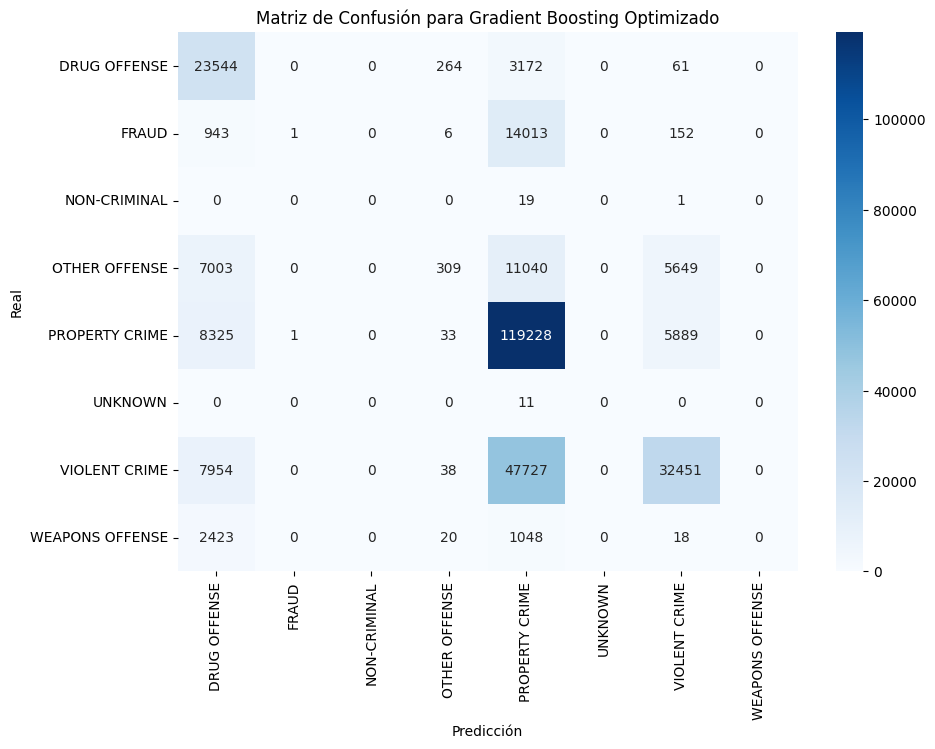

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión para Gradient Boosting Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

#### Visualizacion del modelo

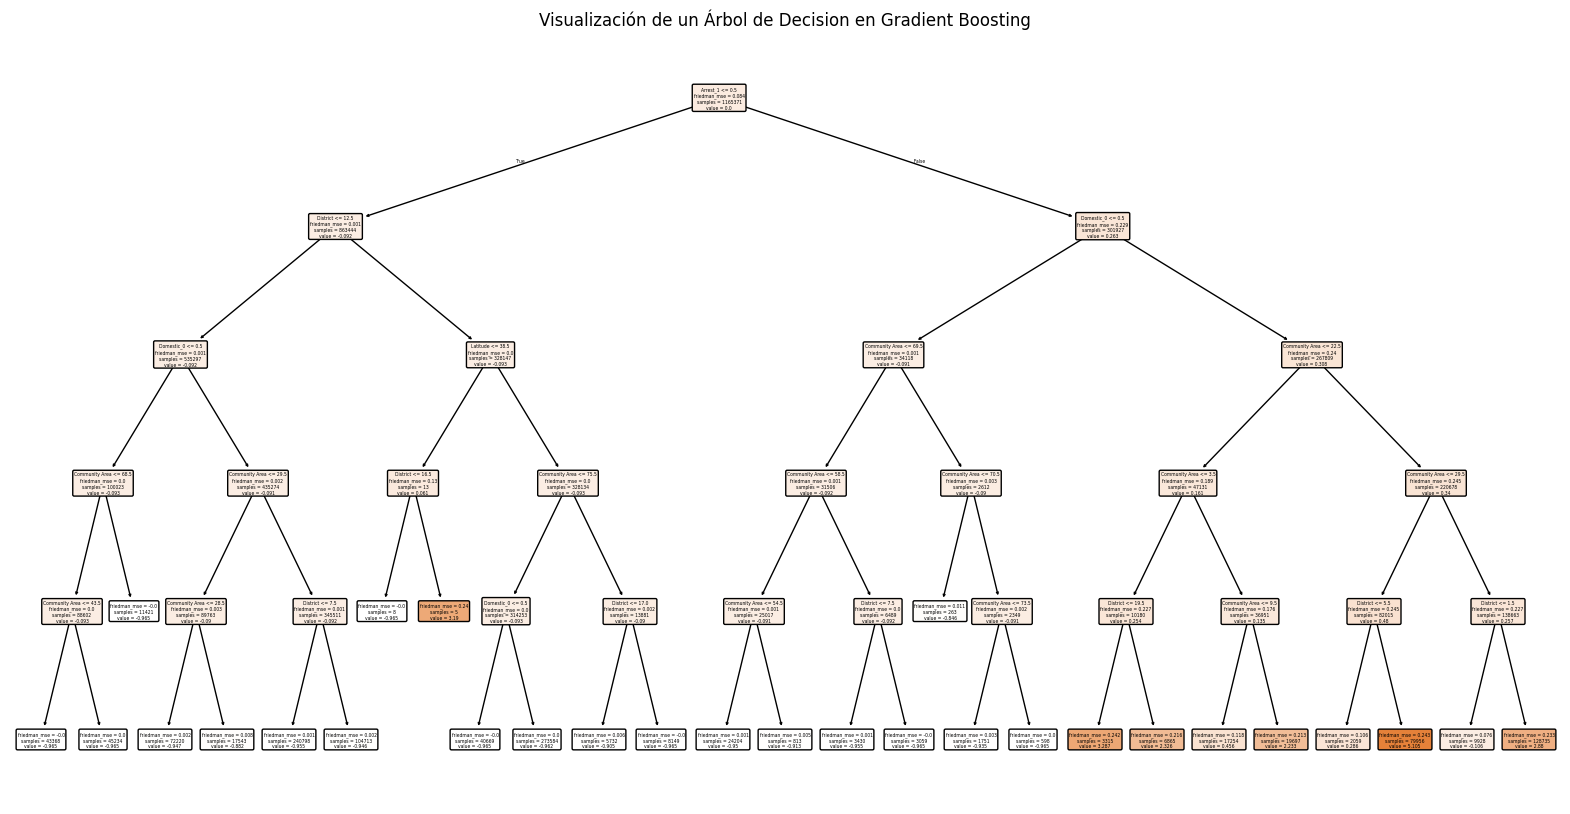

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_gb_model.estimators_[0, 0], filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True)
plt.title("Visualización de un Árbol de Decision en Gradient Boosting")
plt.show()


## **KNN**

### Dividir el dataset en conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)


### Estandarizar los datos

In [ ]:
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_test_knn = scaler_knn.transform(X_test_knn)


### Codificar la variable dependiente (y)

In [ ]:
label_encoder_knn = LabelEncoder()

y_train_knn = label_encoder_knn.fit_transform(y_train_knn)
y_test_knn = label_encoder_knn.transform(y_test_knn)


### Entrenar el modelo KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_knn, y_train_knn)


KNeighborsClassifier(n_neighbors=7)

### Evaluar el modelo

In [ ]:
y_pred_knn = knn_model.predict(X_test_knn)

print("Classification Report:")
print(classification_report(y_test_knn, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.76      0.60     27041
           1       0.18      0.06      0.10     15115
           2       0.00      0.00      0.00        20
           3       0.23      0.08      0.12     24001
           4       0.61      0.76      0.68    133476
           5       0.00      0.00      0.00        11
           6       0.57      0.44      0.50     88170
           7       0.07      0.01      0.01      3509

    accuracy                           0.56    291343
   macro avg       0.27      0.26      0.25    291343
weighted avg       0.53      0.56      0.53    291343



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Matriz de confusión

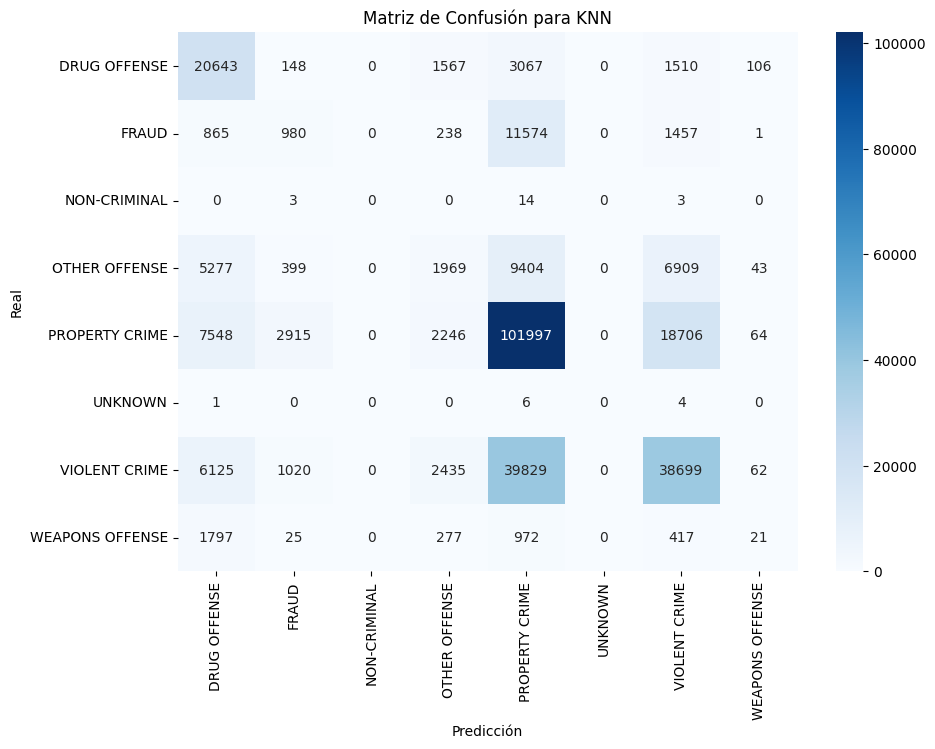

In [ ]:
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_knn.classes_, yticklabels=label_encoder_knn.classes_)
plt.title("Matriz de Confusión para KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Visualización de KNN

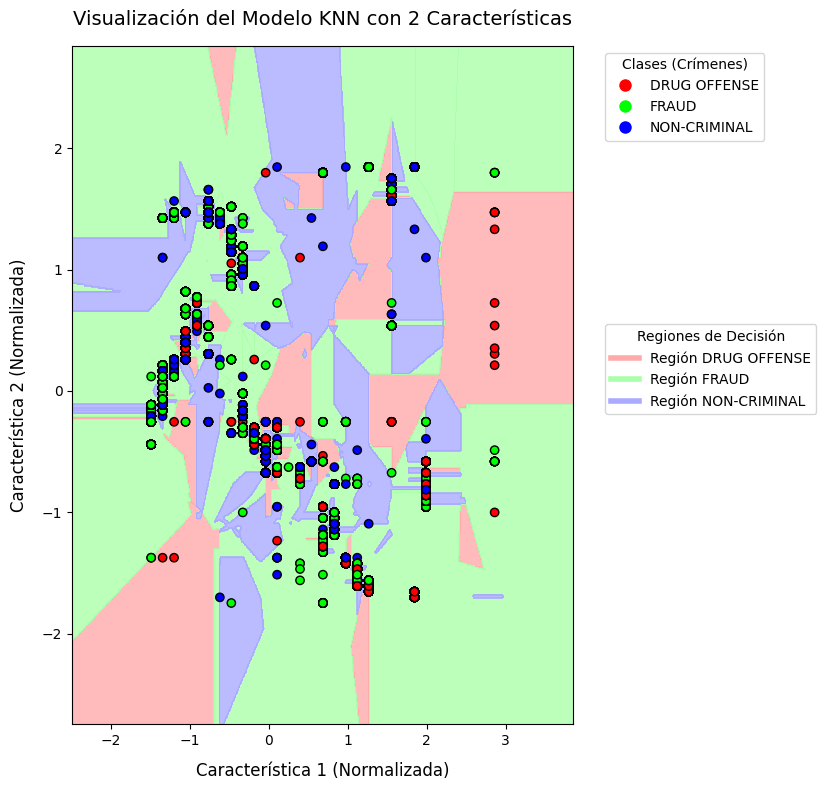

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_visual = X.iloc[:, :2].values
y_visual = y.values

scaler_visual = StandardScaler()
X_visual = scaler_visual.fit_transform(X_visual)

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visual, y_visual, test_size=0.2, random_state=42)

label_encoder_vis = LabelEncoder()
y_train_vis = label_encoder_vis.fit_transform(y_train_vis)
y_test_vis = label_encoder_vis.transform(y_test_vis)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_visual[:, 0].min() - 1, X_visual[:, 0].max() + 1
y_min, y_max = X_visual[:, 1].min() - 1, X_visual[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)

scatter = plt.scatter(X_visual[:, 0], X_visual[:, 1], c=label_encoder_vis.transform(y_visual), cmap=cmap_points, edgecolor='k')

plt.title("Visualización del Modelo KNN con 2 Características", fontsize=14, pad=15)
plt.xlabel("Característica 1 (Normalizada)", fontsize=12, labelpad=10)
plt.ylabel("Característica 2 (Normalizada)", fontsize=12, labelpad=10)

legend_labels = label_encoder_vis.classes_
legend_handles_classes = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                          for color, label in zip(cmap_points.colors, legend_labels)]
legend1 = plt.legend(handles=legend_handles_classes, title="Clases (Crímenes)", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

region_colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
region_labels = legend_labels
legend_handles_regions = [plt.Line2D([0], [0], color=color, lw=4, label=f"Región {label}")
                          for color, label in zip(region_colors, region_labels)]
plt.legend(handles=legend_handles_regions, title="Regiones de Decisión", bbox_to_anchor=(1.05, 0.6), loc='upper left', fontsize=10)

plt.gca().add_artist(legend1)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


EJE X = 'District' y EJE Y = 'Comunity Area', los puntos que se pintan son los tipos de crimenes que mas indicen entre esos dos puntos.

El modelo KNN (K-Nearest Neighbors):
- El modelo clasifica cada crimen observando los puntos más cercanos (sus "vecinos").Por ejemplo:
    - Si un punto nuevo cae en una región verde, el modelo lo clasificaría como "FRAUD".
    - Si cae en una región roja, lo clasificaría como "DRUG OFFENSE".

  - Patrones en los datos:
    - Hay zonas claras donde ciertos tipos de crímenes son dominantes.

  - Ejemplo:
    - Muchas zonas verdes (FRAUD) están mezcladas con zonas azules (NON-CRIMINAL), lo que indica que estas clases podrían estar más relacionadas entre sí.
    - Las zonas rojas (DRUG OFFENSE) parecen más separadas, lo que sugiere que esta clase podría ser más distinta de las otras.

## **Redes Neuronales**

### Dividir en conjunto de entrenamiento y prueba

In [ ]:
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, y, test_size=0.2, random_state=42)

### Escalar las características (Normalización)

In [ ]:
scaler = StandardScaler()
X_train_NN = scaler.fit_transform(X_train_NN)
X_test_NN = scaler.transform(X_test_NN)

### Codificar la variable objetivo (y)

In [ ]:
label_encoder = LabelEncoder()
y_train_NN = label_encoder.fit_transform(y_train_NN)
y_test_NN = label_encoder.transform(y_test_NN)

#### Convertir las etiquetas a formato categórico (one-hot encoding)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train_NN)
y_test_categorical = to_categorical(y_test_NN)

### Construir la red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(len(label_encoder.classes_), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compilar el modelo

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,440 (40.78 KB)

 Trainable params: 10,440 (40.78 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar la red neuronal



In [ ]:
history = model.fit(X_train_NN, y_train_categorical, validation_data=(X_test_NN, y_test_categorical), epochs=20, batch_size=64, verbose=1)

Epoch 1/20
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.5939 - loss: 1.0762 - val_accuracy: 0.5996 - val_loss: 1.0513
Epoch 2/20
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.6012 - loss: 1.0475 - val_accuracy: 0.6006 - val_loss: 1.0440
Epoch 3/20
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.6019 - loss: 1.0411 - val_accuracy: 0.6013 - val_loss: 1.0401
Epoch 4/20
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.6014 - loss: 1.0399 - val_accuracy: 0.6023 - val_loss: 1.0363
Epoch 5/20
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.6027 - loss: 1.0369 - val_accuracy: 0.6024 - val_loss: 1.0377
Epoch 6/20
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.6035 - loss: 1.0346 - val_accuracy: 0.6021 - val_loss: 1.0360
Epoch 7/20
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.6038 - loss: 1.0345 - val_accuracy: 0.6021 - val_loss: 1.0361
Epoch 8/20
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 

### Evaluar el modelo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Accuracy del Modelo: {accuracy:.2f}")

y_pred_categorical = model.predict(X_test)
y_pred = np.argmax(y_pred_categorical, axis=1)



Accuracy del Modelo: 0.46
9105/9105 ━━━━━━━━━━━━━━━━━━━━ 8s 904us/step


### Reporte de clasificación

In [ ]:
print("Reporte de Clasificación de la Red Neuronal:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Reporte de Clasificación de la Red Neuronal:
                 precision    recall  f1-score   support

   DRUG OFFENSE       0.00      0.00      0.00     27041
          FRAUD       0.00      0.00      0.00     15115
   NON-CRIMINAL       0.00      0.00      0.00        20
  OTHER OFFENSE       0.00      0.00      0.00     24001
 PROPERTY CRIME       0.46      1.00      0.63    133476
        UNKNOWN       0.00      0.00      0.00        11
  VIOLENT CRIME       0.00      0.00      0.00     88170
WEAPONS OFFENSE       0.00      0.00      0.00      3509

       accuracy                           0.46    291343
      macro avg       0.06      0.12      0.08    291343
   weighted avg       0.21      0.46      0.29    291343



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Matriz de confusión

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[     0      0      0      0  27041      0      0      0]
 [     0      0      0      0  15115      0      0      0]
 [     0      0      0      0     20      0      0      0]
 [     0      0      0      0  24001      0      0      0]
 [     0      0      0      0 133476      0      0      0]
 [     0      0      0      0     11      0      0      0]
 [     0      0      0      0  88170      0      0      0]
 [     0      0      0      0   3509      0      0      0]]


### Visualización del desempeño

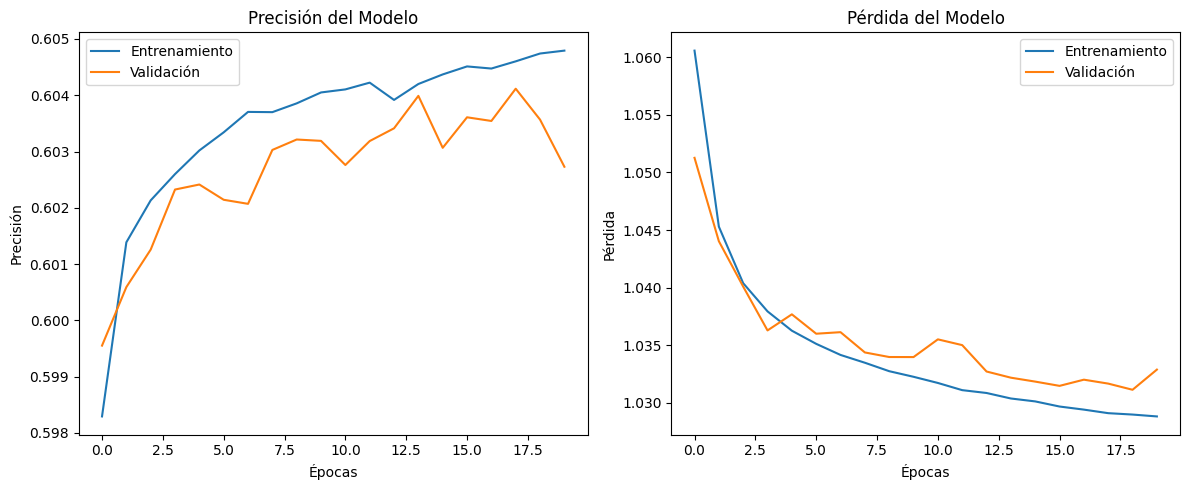

In [ ]:
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Preparación de Datos:
- Se separan las características (X) y la variable objetivo (y).
- Se normalizan las características con StandardScaler.
- Se codifican las etiquetas en valores numéricos y luego se convierten en formato categórico con to_categorical.

Construcción de la Red Neuronal:
- La red tiene:
  - Capa de entrada con 128 neuronas y activación ReLU.
  - Capa oculta con 64 neuronas y activación ReLU.
  - Capa de salida con tantas neuronas como clases y activación softmax.
  - Se utiliza categorical_crossentropy como función de pérdida porque estamos haciendo clasificación multiclase.
  - Se utiliza el optimizador adam para entrenar el modelo.

- Entrenamiento:
  - El modelo se entrena durante 20 épocas con un tamaño de lote de 64.
  - Se valida en el conjunto de prueba durante el entrenamiento.
- Evaluación:
  - Se calcula la precisión (accuracy) en el conjunto de prueba.
  - Se genera un reporte de clasificación con métricas como precisión, recall y F1-score.
  - Se muestra la matriz de confusión.
-Visualización:
  - Se generan gráficos para observar cómo cambian la precisión y la pérdida del modelo durante el entrenamiento.

### **Mejora del modelo Redes Neuronales**

#### Importar librerias necesarias

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

#### Dividir el dataset en entrenamiento y prueba


In [ ]:
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalizacion

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_NN = scaler.fit_transform(X_train_NN)
X_test_NN = scaler.transform(X_test_NN)

#### Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_NN = label_encoder.fit_transform(y_train_NN)
y_test_NN = label_encoder.transform(y_test_NN)

#### Convertir las etiquetas a formato categórico (one-hot encoding)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train_NN)
y_test_categorical = to_categorical(y_test_NN)

#### Crear el modelo

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=X_train_NN.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Regularización con Dropout

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Regularización con Dropout

model.add(Dense(64, activation='relu'))

model.add(Dense(len(label_encoder.classes_), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Configurar el optimizador SGD con momentum

In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

#### Compilar el modelo

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,976 (171.78 KB)

 Trainable params: 43,976 (171.78 KB)

 Non-trainable params: 0 (0.00 B)

#### Configurar Early Stopping y entrenamiento del modelo

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_NN,
    y_train_categorical,
    validation_data=(X_test_NN, y_test_categorical),
    epochs=100,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.5901 - loss: 1.1003 - val_accuracy: 0.5968 - val_loss: 1.0745
Epoch 2/100
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.5972 - loss: 1.0743 - val_accuracy: 0.5966 - val_loss: 1.0706
Epoch 3/100
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.5972 - loss: 1.0721 - val_accuracy: 0.5965 - val_loss: 1.0686
Epoch 4/100
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.5977 - loss: 1.0684 - val_accuracy: 0.5967 - val_loss: 1.0663
Epoch 5/100
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.5981 - loss: 1.0672 - val_accuracy: 0.5967 - val_loss: 1.0645
Epoch 6/100
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.5978 - loss: 1.0665 - val_accuracy: 0.5972 - val_loss: 1.0658
Epoch 7/100
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.5976 - loss: 1.0671 - val_accuracy: 0.5978 - val_loss: 1.0641
Epoch 8/100
18209/18209 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - ac

#### Evaluar en el conjunto de prueba

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Accuracy del Modelo: {accuracy:.2f}")

Accuracy del Modelo: 0.60


#### Realizar predicciones

In [ ]:
y_pred_categorical = model.predict(X_test)
y_pred = np.argmax(y_pred_categorical, axis=1)

9105/9105 ━━━━━━━━━━━━━━━━━━━━ 7s 804us/step


#### Reporte de clasificación

In [ ]:
print("Contenido de label_encoder.classes_:", label_encoder.classes_)

print("Reporte de Clasificación de la Red Neuronal:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Contenido de label_encoder.classes_: ['DRUG OFFENSE' 'FRAUD' 'NON-CRIMINAL' 'OTHER OFFENSE' 'PROPERTY CRIME'
 'UNKNOWN' 'VIOLENT CRIME' 'WEAPONS OFFENSE']
Reporte de Clasificación de la Red Neuronal:
                 precision    recall  f1-score   support

   DRUG OFFENSE       0.45      0.92      0.60     27041
          FRAUD       0.00      0.00      0.00     15115
   NON-CRIMINAL       0.00      0.00      0.00        20
  OTHER OFFENSE       0.00      0.00      0.00     24001
 PROPERTY CRIME       0.61      0.88      0.72    133476
        UNKNOWN       0.00      0.00      0.00     88170
  VIOLENT CRIME       0.00      0.00      0.00      3509
WEAPONS OFFENSE       0.00      0.00      0.00        11

       accuracy                           0.49    291343
      macro avg       0.13      0.23      0.17    291343
   weighted avg       0.32      0.49      0.39    291343



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Matriz de confusión

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[ 25024      0      0      0   2002     15      0      0]
 [  1127      0      0      0  13844    144      0      0]
 [     0      0      0      0     19      1      0      0]
 [  7722      0      0      0  10652   5627      0      0]
 [ 10623      0      0      0 116998   5855      0      0]
 [  9058      0      0      0  46724  32388      0      0]
 [  2634      0      0      0    860     15      0      0]
 [     0      0      0      0     11      0      0      0]]


#### Visualizar la precisión y pérdida durante el entrenamiento


Precision

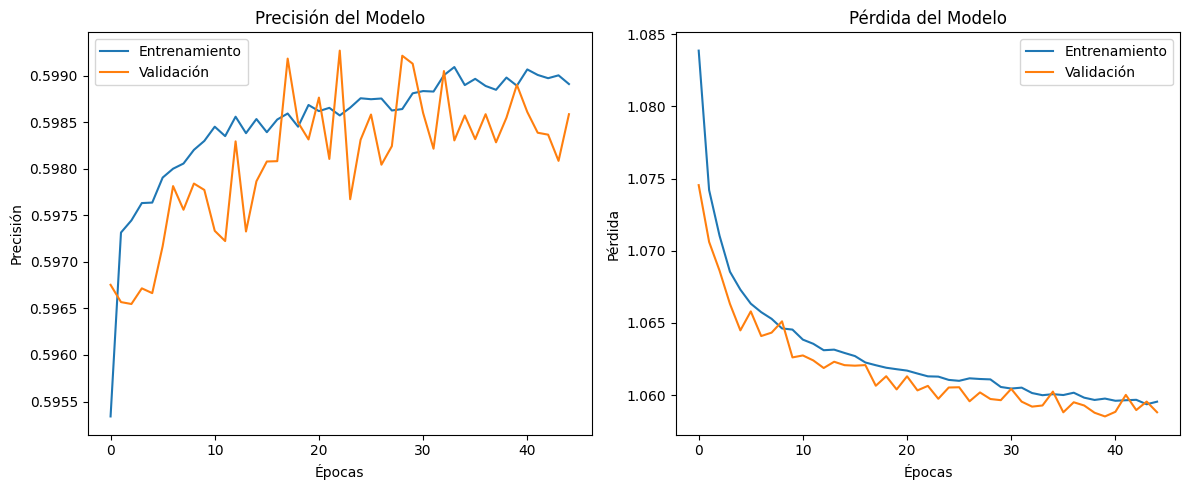

In [ ]:
# Precision
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Perdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Perdida

## **K-Means**

## **Método del codo**

### Preparar los datos

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X_clustering = dataL.drop(columns=['Primary Type', 'Date', 'Block', 'Description', 'Location Description', 'Location', 'Unnamed: 0'])

### Normalizar las características



In [ ]:
scaler = StandardScaler()
X_clustering = scaler.fit_transform(X_clustering)

### Aplicar el método del codo

In [ ]:
inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

### Visualizar el método del codo

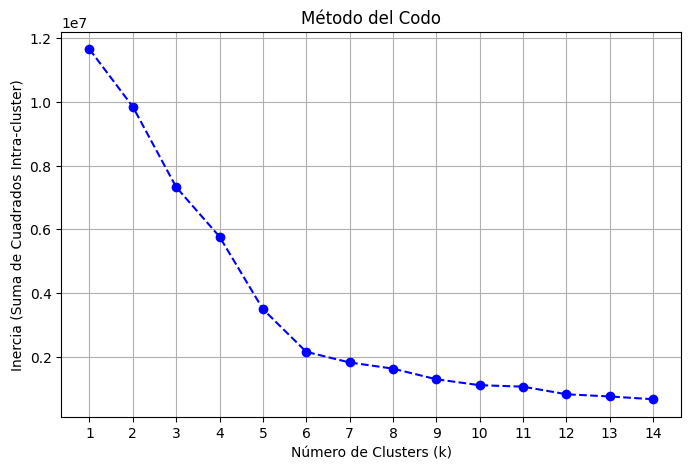

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de Cuadrados Intra-cluster)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## **Modelo K-Means**

### Determinar el número óptimo de clusters

In [ ]:
k_optimal = 5

### Ajustar el modelo K-Means con el número óptimo de clusters

In [ ]:
kmeans_model = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_model.fit(X_clustering)

KMeans(n_clusters=5, random_state=42)

### Asignar los clusters al dataset

In [ ]:
dataL['Cluster'] = kmeans_model.labels_

### Visualización de los clusters (opcional, si tienes 2 o 3 dimensiones)

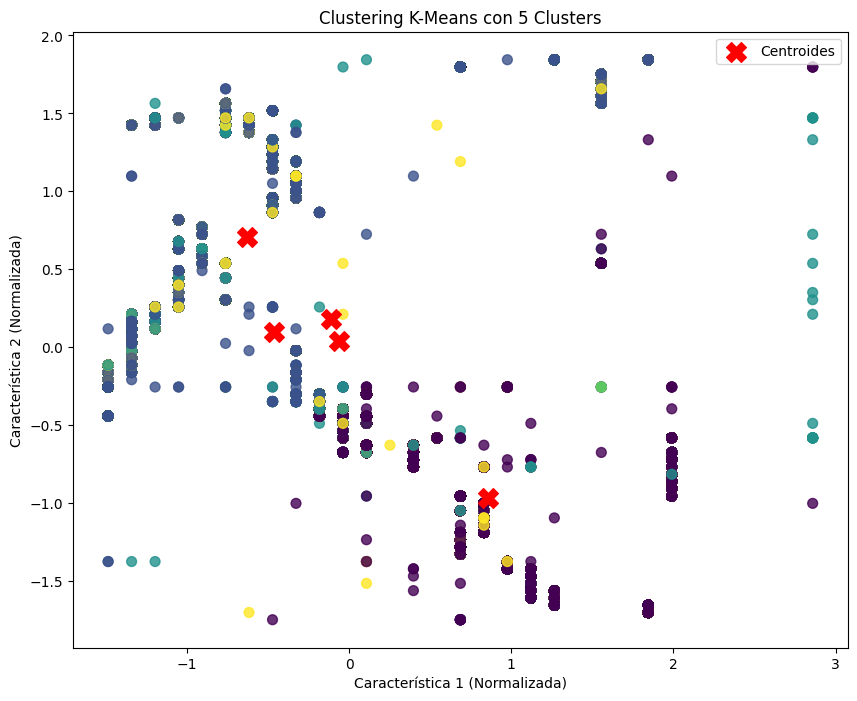

In [ ]:
X_visual_kmeans = X_clustering[:, :2]

plt.figure(figsize=(10, 8))
plt.scatter(X_visual_kmeans[:, 0], X_visual_kmeans[:, 1], c=kmeans_model.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title(f"Clustering K-Means con {k_optimal} Clusters")
plt.xlabel("Característica 1 (Normalizada)")
plt.ylabel("Característica 2 (Normalizada)")
plt.legend()
plt.show()

### Análisis de los clusters

In [ ]:
numeric_columns = dataL.select_dtypes(include=['float64', 'int64']).columns

cluster_summary = dataL.groupby('Cluster')[numeric_columns].mean()
print("Estadísticas por Cluster:")
print(cluster_summary)

Estadísticas por Cluster:
            Unnamed: 0   District  Community Area   Latitude  Longitude  \
Cluster                                                                   
0        745390.579267  17.172776       16.710248  41.054624      -87.0   
1        740718.029297   6.916684       52.598839  41.000000      -87.0   
2        683129.073768  10.830638       38.308988  41.000470      -87.0   
3        595655.935065   8.077922       39.493506  36.000000      -91.0   
4        736428.516376  10.501266       41.298613  41.017492      -87.0   

         Arrest_0  Arrest_1  Domestic_0  Domestic_1  
Cluster                                              
0        0.987779  0.012221    1.000000    0.000000  
1        1.000000  0.000000    1.000000    0.000000  
2        0.000000  1.000000    1.000000    0.000000  
3        0.779221  0.220779    0.831169    0.168831  
4        0.805950  0.194050    0.000000    1.000000  


## **Comparar Modelos y Visualizar Accuracies**

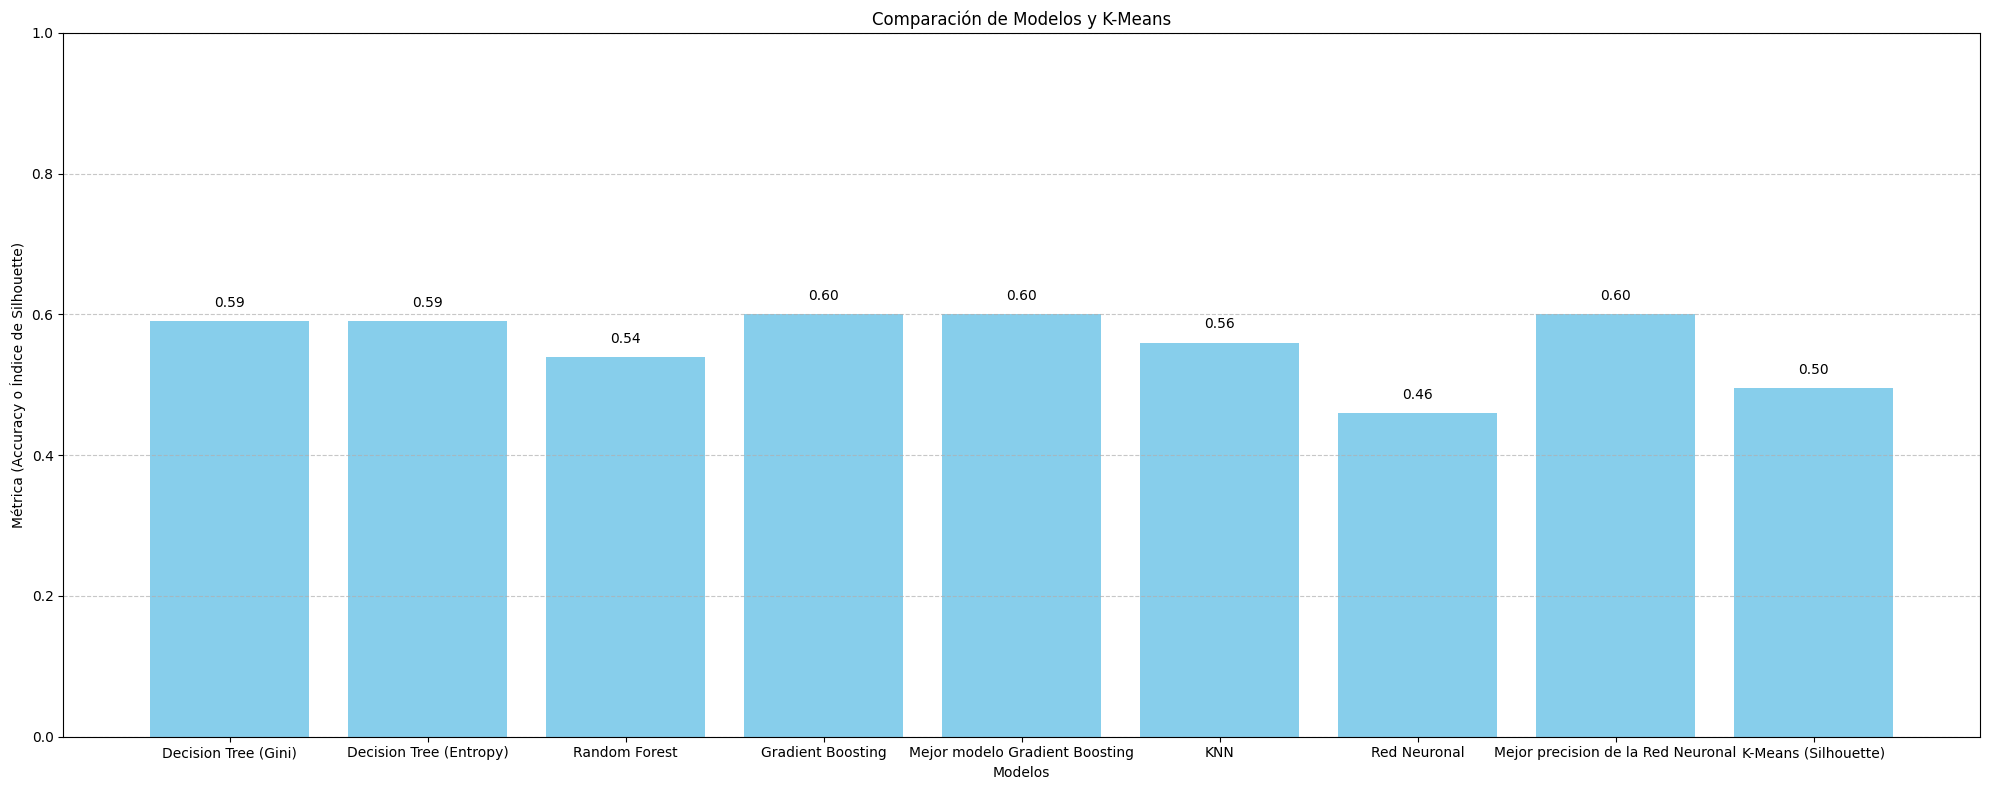

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

X_sample = resample(X_clustering, n_samples=10000, random_state=42)
kmeans_labels_sample = kmeans_model.predict(X_sample)

silhouette_avg = silhouette_score(X_sample, kmeans_labels_sample)

model_metrics = {
    "Decision Tree (Gini)": 0.59,
    "Decision Tree (Entropy)": 0.59,
    "Random Forest": 0.54,
    "Gradient Boosting": 0.60,
    "Mejor modelo Gradient Boosting": 0.60,
    "KNN": 0.56,
    "Red Neuronal": 0.46,
    "Mejor precision de la Red Neuronal": 0.60,
    "K-Means (Silhouette)": silhouette_avg
}

plt.figure(figsize=(20, 8))
models = list(model_metrics.keys())
metrics = list(model_metrics.values())

plt.bar(models, metrics, color='skyblue')
plt.title('Comparación de Modelos y K-Means')
plt.ylabel('Métrica (Accuracy o Índice de Silhouette)')
plt.xlabel('Modelos')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()
